# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Kurniati Laeli Munifah
- Email: k.laelimunifah@gmail.com
- Id Dicoding: klmunifah

## Persiapan

### Menyiapkan library yang dibutuhkan

In [84]:
# Import library yang dibutuhkan
!pip install pycountry_convert
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import f_oneway
import pycountry_convert as pc
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import resample, shuffle
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score , classification_report , accuracy_score , auc, roc_curve, confusion_matrix, RocCurveDisplay
from itertools import cycle

### Menyiapkan data yang akan digunakan

Menyiapkan data yang digunakan, akan disimpan ke dalam dataframe students_df, delimeter diatur menjadi ; agar berkas dapat terbaca dengan baik.

In [85]:
# Membaca data
!wget --no-check-certificate \
  https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv \
  -O /content/data.csv

students_df = pd.read_csv("data.csv", delimiter=";")
students_df.to_csv("students_data.csv", index=False)
students_df.head(10)

--2024-06-29 01:16:23--  https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528772 (516K) [text/plain]
Saving to: ‘/content/data.csv’

/content/data.csv   100%[===================>] 516.38K  --.-KB/s    in 0.02s   

2024-06-29 01:16:24 (29.5 MB/s) - ‘/content/data.csv’ saved [528772/528772]



Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   
5               2                39                  1    9991   
6               1                 1                  1    9500   
7               1                18                  4    9254   
8               1                 1                  3    9238   
9               1                 1                  1    9238   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   
5                           0                      19   
6                           1                       1   
7                           1                       1   
8                           1                       1   
9                           1                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1                     37   
3                         122.0            1                     38   
4                         100.0            1                     37   
5                         133.1            1                     37   
6                         142.0            1                     19   
7                         119.0            1                     37   
8                         137.0           62                      1   
9                         138.0            1                      1   

   Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
0                     12  ...                                  0   
1                      3  ...                                  0   
2                     37  ...                                  0   
3                     37  ...                                  0   
4                     38  ...                                  0   
5                     37  ...                                  0   
6                     38  ...                                  0   
7                     37  ...                                  0   
8                      1  ...                                  0   
9                     19  ...                                  0   

   Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
0                                  0                                     0   
1                                  6                                     6   
2                                  6                                     0   
3                                  6                                    10   
4                                  6                                     6   
5                                  5                                    17   
6                                  8                                     8   
7                                  5                                     5   
8                                  6                                     7   
9                                  6                                    14   

   Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
0                                  0                        0.000000   
1                                  6                       13.666667   
2                                  0      

## Data Understanding

Pada proses ini dilakukan pengecekan kolom, tipe data, dan adanya missing value. Dapat dilihat bahwa tidak ada kolom dengan baris bernilai null. Selain itu, dilakukan penambahan parameter ID dari indeks dataframe.

In [86]:
# Mengecek nama kolom yang ada
students_df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [87]:
# Mengecek tipe data dan missing value
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [88]:
# Menambahkan student ID
students_df["ID"] = students_df.index

Pada bagian selanjutnya dilakukan proses data understanding. Untuk mempermudah pemahaman data numerik dan kategori, dilakukan pembagian data menjadi students_df_num untuk data numerik, dan students_df_cat untuk data kategori.

In [89]:
# data numerical
students_df_num = students_df[["Application_order", "Previous_qualification_grade",
                               "Admission_grade", "Age_at_enrollment", "Curricular_units_1st_sem_credited",
                               "Curricular_units_1st_sem_enrolled", "Curricular_units_1st_sem_evaluations",
                               "Curricular_units_1st_sem_approved", "Curricular_units_1st_sem_grade",
                               "Curricular_units_1st_sem_without_evaluations", "Curricular_units_2nd_sem_credited",
                               "Curricular_units_2nd_sem_enrolled", "Curricular_units_2nd_sem_evaluations",
                               "Curricular_units_2nd_sem_approved", "Curricular_units_2nd_sem_grade",
                               "Curricular_units_2nd_sem_without_evaluations", "Unemployment_rate",
                               "Inflation_rate", "GDP"]]
students_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Application_order                             4424 non-null   int64  
 1   Previous_qualification_grade                  4424 non-null   float64
 2   Admission_grade                               4424 non-null   float64
 3   Age_at_enrollment                             4424 non-null   int64  
 4   Curricular_units_1st_sem_credited             4424 non-null   int64  
 5   Curricular_units_1st_sem_enrolled             4424 non-null   int64  
 6   Curricular_units_1st_sem_evaluations          4424 non-null   int64  
 7   Curricular_units_1st_sem_approved             4424 non-null   int64  
 8   Curricular_units_1st_sem_grade                4424 non-null   float64
 9   Curricular_units_1st_sem_without_evaluations  4424 non-null   i

In [90]:
# data categorical
students_df_cat = students_df[["Marital_status", "Application_mode", "Course",
                              "Daytime_evening_attendance", "Previous_qualification",
                              "Nacionality", "Mothers_qualification", "Fathers_qualification",
                              "Mothers_occupation", "Fathers_occupation", "Displaced",
                              "Educational_special_needs", "Debtor", "Tuition_fees_up_to_date",
                              "Gender", "Scholarship_holder", "International"]].astype(str)
students_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Marital_status              4424 non-null   object
 1   Application_mode            4424 non-null   object
 2   Course                      4424 non-null   object
 3   Daytime_evening_attendance  4424 non-null   object
 4   Previous_qualification      4424 non-null   object
 5   Nacionality                 4424 non-null   object
 6   Mothers_qualification       4424 non-null   object
 7   Fathers_qualification       4424 non-null   object
 8   Mothers_occupation          4424 non-null   object
 9   Fathers_occupation          4424 non-null   object
 10  Displaced                   4424 non-null   object
 11  Educational_special_needs   4424 non-null   object
 12  Debtor                      4424 non-null   object
 13  Tuition_fees_up_to_date     4424 non-null   obje

Setelah dibagi, data kemudian dieksplorasi dan dianalisis.

### Eksplorasi dan Analisis Data Numerikal

Setelah menampilkan data numerikal, dilakukan perhitungan untuk mendeskripsikan data numerikal. Hasil perhitungan tersebut menunjukkan tidak ada data yang menyimpang.

In [91]:
# Menampilkan data numerical
students_df_num

Application_order  Previous_qualification_grade  Admission_grade  \
0                     5                         122.0            127.3   
1                     1                         160.0            142.5   
2                     5                         122.0            124.8   
3                     2                         122.0            119.6   
4                     1                         100.0            141.5   
...                 ...                           ...              ...   
4419                  6                         125.0            122.2   
4420                  2                         120.0            119.0   
4421                  1                         154.0            149.5   
4422                  1                         180.0            153.8   
4423                  1                         152.0            152.0   

      Age_at_enrollment  Curricular_units_1st_sem_credited  \
0                    20                                  0   
1                    19                                  0   
2                    19                                  0   
3                    20                                  0   
4                    45                                  0   
...                 ...                                ...   
4419                 19                                  0   
4420                 18                                  0   
4421                 30                                  0   
4422                 20                                  0   
4423                 22                                  0   

      Curricular_units_1st_sem_enrolled  Curricular_units_1st_sem_evaluations  \
0                                     0                                     0   
1                                     6                                     6   
2                                     6                                     0   
3                                     6                                     8   
4                                     6                                     9   
...                                 ...                                   ...   
4419                                  6                                     7   
4420                                  6                                     6   
4421                                  7                                     8   
4422                                  5                                     5   
4423                                  6                                     8   

      Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
0                                     0                        0.000000   
1                                     6                       14.000000   
2                                     0                        0.000000   
3                                     6                       13.428571   
4                                     5                       12.333333   
...                                 ...                             ...   
4419                                  5                       13.600000   
4420                                  6                       12.000000   
4421                                  7                       14.912500   
4422                                  5                       13.800000   
4423                                  6                       11.666667   

      Curricular_units_1st_sem_without_evaluations  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
4419                                             0   
4420                                             0   
4421        

In [92]:
# Describe data numerical
students_df_num.describe()

Application_order  Previous_qualification_grade  Admission_grade  \
count        4424.000000                   4424.000000      4424.000000   
mean            1.727848                    132.613314       126.978119   
std             1.313793                     13.188332        14.482001   
min             0.000000                     95.000000        95.000000   
25%             1.000000                    125.000000       117.900000   
50%             1.000000                    133.100000       126.100000   
75%             2.000000                    140.000000       134.800000   
max             9.000000                    190.000000       190.000000   

       Age_at_enrollment  Curricular_units_1st_sem_credited  \
count        4424.000000                        4424.000000   
mean           23.265145                           0.709991   
std             7.587816                           2.360507   
min            17.000000                           0.000000   
25%            19.000000                           0.000000   
50%            20.000000                           0.000000   
75%            25.000000                           0.000000   
max            70.000000                          20.000000   

       Curricular_units_1st_sem_enrolled  \
count                        4424.000000   
mean                            6.270570   
std                             2.480178   
min                             0.000000   
25%                             5.000000   
50%                             6.000000   
75%                             7.000000   
max                            26.000000   

       Curricular_units_1st_sem_evaluations  \
count                           4424.000000   
mean                               8.299051   
std                                4.179106   
min                                0.000000   
25%                                6.000000   
50%                                8.000000   
75%                               10.000000   
max                               45.000000   

       Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
count                        4424.000000                     4424.000000   
mean                            4.706600                       10.640822   
std                             3.094238                        4.843663   
min                             0.000000                        0.000000   
25%                             3.000000                       11.000000   
50%                             5.000000                       12.285714   
75%                             6.000000                       13.400000   
max                            26.000000                       18.875000   

       Curricular_units_1st_sem_without_evaluations  \
count                                   4424.000000   
mean                                       0.137658   
std                                        0.690880   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                       12.000000   

       Curricular_units_2nd_sem_credited  Curricular_units_2nd_sem_enrolled  \
count                        4424.000000                        4424.000000   
mean                            0.541817                           6.232143   
std                             1.918546                           2.195951   
min                             0.000000                           0.000000   
25%                             0.000000                           5.000000   
50%                             0.000000                           6.000000   
75%                             0.000000                           7.000000   
max                            19.000000                          23.000000   

       Curricular_units_2nd_sem_evaluations  \
co

Untuk mengetahui sebaran data numerical, data tersebut akan dipaparkan dalam sebuah grafik histogram yang dibagi berdasarkan status mahasiswa yaitu Graduate, Dropout, dan Enrolled. Proses ini dilakukan dengan bantuan helper function hist_graph(). Garis merah merupakan garis yang menunjukkan rata-rata dari setiap data.

In [93]:
# Helper function menggambar grafik histogram
def hist_graph(features, data, segment_feature):
    fig, ax = plt.subplots(len(features), 1,figsize=(10,100))

    for i, column in enumerate(data[features]):
        mean = data[column].mean()
        sns.kdeplot(data[data[segment_feature] == "Graduate"][column] , fill=True, color="#334CFF", label="Graduate", ax=ax[i])
        sns.kdeplot(data[data[segment_feature] == "Enrolled"][column], fill=True, color="#1BB00A", label="Enrolled", ax=ax[i])
        sns.kdeplot(data[data[segment_feature] == "Dropout"][column], fill=True, color="#D50808", label="Dropout", ax=ax[i])
        ax[i].axvline(mean, c="red")
        ax[i].set_xlabel(column)
        ax[i].set_ylabel("Frequency")
        ax[i].set_title(f"{column} Distribution over Status")
        ax[i].legend()


    plt.tight_layout()
    plt.show()

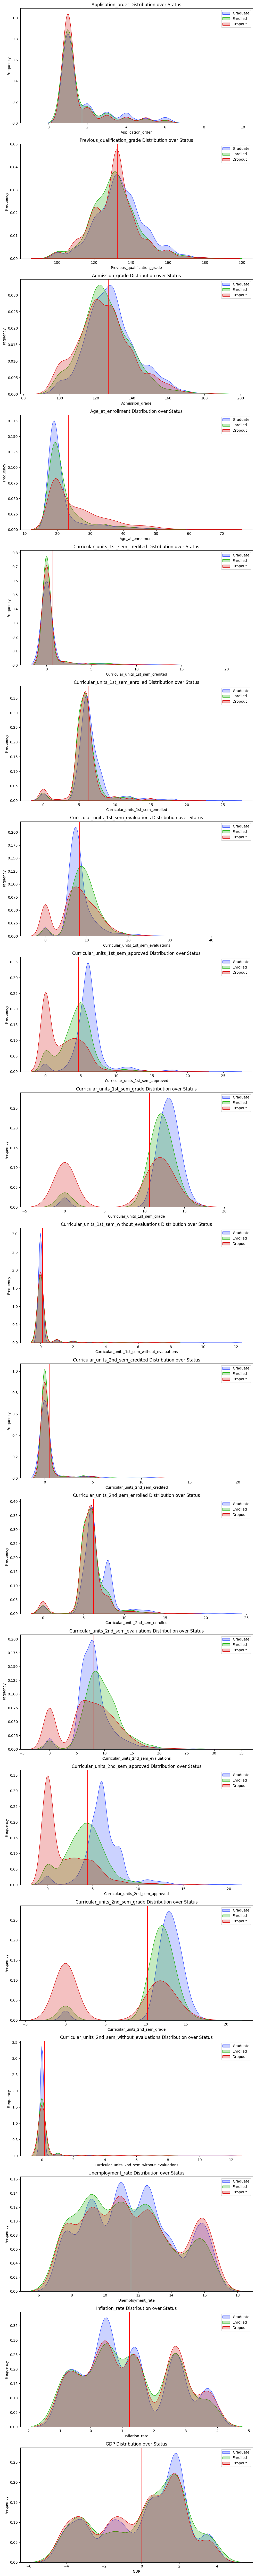

In [94]:
# Grafik histogram dari masing-masing parameter numerical
hist_graph(
    features=students_df_num.columns,
    data=students_df,
    segment_feature="Status"
)

Selanjutnya nilai korelasi dari masing-masing data numerical dilakukan dengan menggunakan heatmap

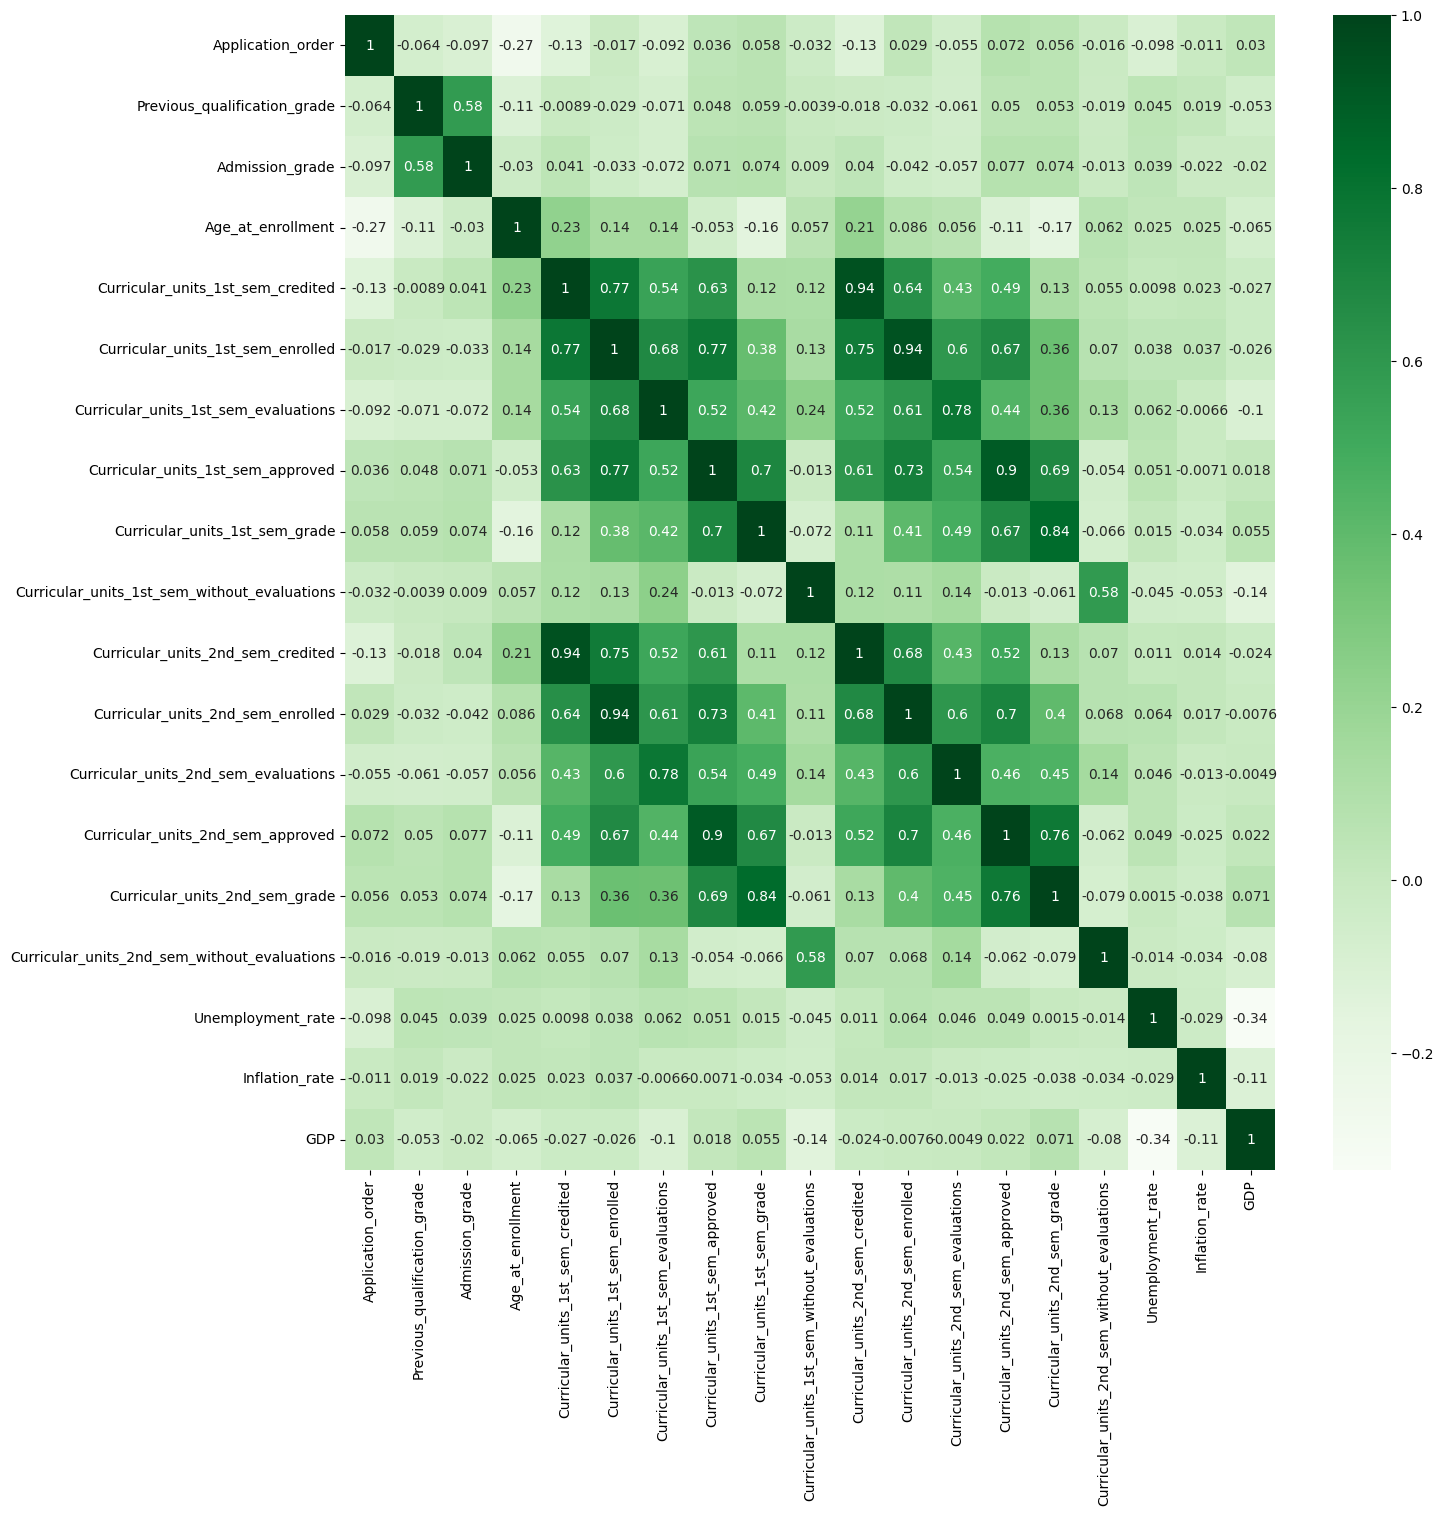

In [95]:
# Korelasi antar parameter numerical
corr = students_df_num.corr()
fig1 , ax1 = plt.subplots(figsize=(15 , 15))
sns.heatmap(corr ,annot= True , ax=ax1 , cmap= "Greens");

Dapat dilihat parameter nilai dari total curiculumn unit semester 1 dan 2 seluruhnya berkorelasi positif, sehingga dilakukan penggabungan data parameter tersebut. Untuk total kurikulum unit dari masing-masin katgerori (credited, approved, enrolled, dan without evaluations) akan di jumlahkan sedangkan grade yang diperoleh siswa akan dirata-rata. Setelah digabungkan data awal dari students_df_num akan dihapus.

In [96]:
# Feature engineering untuk parameter curricular_units
students_df_num["Curricular_units_credited"] = students_df_num["Curricular_units_1st_sem_credited"] + students_df_num["Curricular_units_2nd_sem_credited"]
students_df_num["Curricular_units_approved"] = students_df_num["Curricular_units_1st_sem_approved"] + students_df_num["Curricular_units_2nd_sem_approved"]
students_df_num["Curricular_units_enrolled"] = students_df_num["Curricular_units_1st_sem_enrolled"] + students_df_num["Curricular_units_2nd_sem_enrolled"]
students_df_num["Curricular_units_evaluations"] = students_df_num["Curricular_units_1st_sem_evaluations"] + students_df_num["Curricular_units_2nd_sem_evaluations"]
students_df_num["Curricular_units_without_evaluations"] = students_df_num["Curricular_units_1st_sem_without_evaluations"] + students_df_num["Curricular_units_2nd_sem_without_evaluations"]
students_df_num["Curricular_units_grade"] = (students_df_num["Curricular_units_1st_sem_grade"] + students_df_num["Curricular_units_2nd_sem_grade"]) / 2

<ipython-input-96-7de29c8cff61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students_df_num["Curricular_units_credited"] = students_df_num["Curricular_units_1st_sem_credited"] + students_df_num["Curricular_units_2nd_sem_credited"]
<ipython-input-96-7de29c8cff61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students_df_num["Curricular_units_approved"] = students_df_num["Curricular_units_1st_sem_approved"] + students_df_num["Curricular_units_2nd_sem_approved"]
<ipython-input-96-7de29c8cff61>:4: Setti

In [97]:
# Menghapus data sebelumnya
students_df_num = students_df_num.drop(columns=["Curricular_units_1st_sem_credited", "Curricular_units_1st_sem_approved",
                                        "Curricular_units_1st_sem_enrolled", "Curricular_units_1st_sem_evaluations", "Curricular_units_1st_sem_without_evaluations", "Curricular_units_1st_sem_grade",
                                        "Curricular_units_2nd_sem_credited", "Curricular_units_2nd_sem_approved",
                                        "Curricular_units_2nd_sem_enrolled", "Curricular_units_2nd_sem_evaluations", "Curricular_units_2nd_sem_without_evaluations", "Curricular_units_2nd_sem_grade"])

Selanjutnya dilakukan uji ANOVA untuk mengetahui keterkaitan data numerical dengan status mahasiswa. Nilai P-value di atas 0.05 menunjukkan bahwa data tersebut tidak memiliki pengaruh dan akan dihapus dari dataframe untuk pengujian model. Uji ini dilakukan dengan bantuan helper function anova_result()

In [98]:
# Helper function anova_result()
def anova_result(df, df_num):
  df_num["ID"] = df_num.index
  data = pd.merge(df_num, df, how="outer", on="ID")

  columns = df_num.drop(columns = ["ID"]).columns
  for column in columns:
    CategoryGroupLists=data.groupby("Status")[column].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    print(f"P-Value for Anova between Status and {column} is: ", AnovaResults[1])

In [99]:
anova_result(students_df[["ID", "Status"]], students_df_num)

P-Value for Anova between Status and Application_order is:  2.955292721111232e-09
P-Value for Anova between Status and Previous_qualification_grade is:  1.0777825583187265e-12
P-Value for Anova between Status and Admission_grade is:  4.380466113389808e-16
P-Value for Anova between Status and Age_at_enrollment is:  1.138848633132498e-65
P-Value for Anova between Status and Unemployment_rate is:  0.002699757038015915
P-Value for Anova between Status and Inflation_rate is:  0.17529171243976469
P-Value for Anova between Status and GDP is:  0.008280870491705995
P-Value for Anova between Status and Curricular_units_credited is:  0.00011430258163566643
P-Value for Anova between Status and Curricular_units_approved is:  0.0
P-Value for Anova between Status and Curricular_units_enrolled is:  3.765455050821e-30
P-Value for Anova between Status and Curricular_units_evaluations is:  4.123196639974353e-29
P-Value for Anova between Status and Curricular_units_without_evaluations is:  2.8928394814089

Dari hasil test anova dapat dilihat bahwa parameter Inflation_rate jelas tidak memiliki pengaruh dengan Status mahasiswa. Sedanngkan untuk parameter GDP dan Unemployment_rate memang memiliki nilai P-value<0.05 akan tetapi nilainya terbilang besar dibanding parameter lain. Sehingga dalam proses ini parameter Inflation_rate, GDP, dan Unemployment_rate yang akan dihapus dari data.

In [100]:
# Menghapus Inflation_rate, GDP, dan Unemployment_rate
students_df_num = students_df_num.drop(columns=["Inflation_rate",  "GDP", "Unemployment_rate"])

Selanjutnya korelasi antar parameter numerical serta deskripsi data numerikal yang sudah diolah ditampilkan kembali.
Setelah proses analisis data numerik selesai, data numerik kemudian digabungkan kembali ke students_df. Selanjutnya kita akan melihat sebaran data yang baru dan menarik kesimpulan.

In [101]:
# Menampilkan dataframe numerikal baru students_df_num
students_df_num.head()

Application_order  Previous_qualification_grade  Admission_grade  \
0                  5                         122.0            127.3   
1                  1                         160.0            142.5   
2                  5                         122.0            124.8   
3                  2                         122.0            119.6   
4                  1                         100.0            141.5   

   Age_at_enrollment  Curricular_units_credited  Curricular_units_approved  \
0                 20                          0                          0   
1                 19                          0                         12   
2                 19                          0                          0   
3                 20                          0                         11   
4                 45                          0                         11   

   Curricular_units_enrolled  Curricular_units_evaluations  \
0                          0                             0   
1                         12                            12   
2                         12                             0   
3                         12                            18   
4                         12                            15   

   Curricular_units_without_evaluations  Curricular_units_grade  ID  
0                                     0                0.000000   0  
1                                     0               13.833333   1  
2                                     0                0.000000   2  
3                                     0               12.914286   3  
4                                     0               12.666667   4

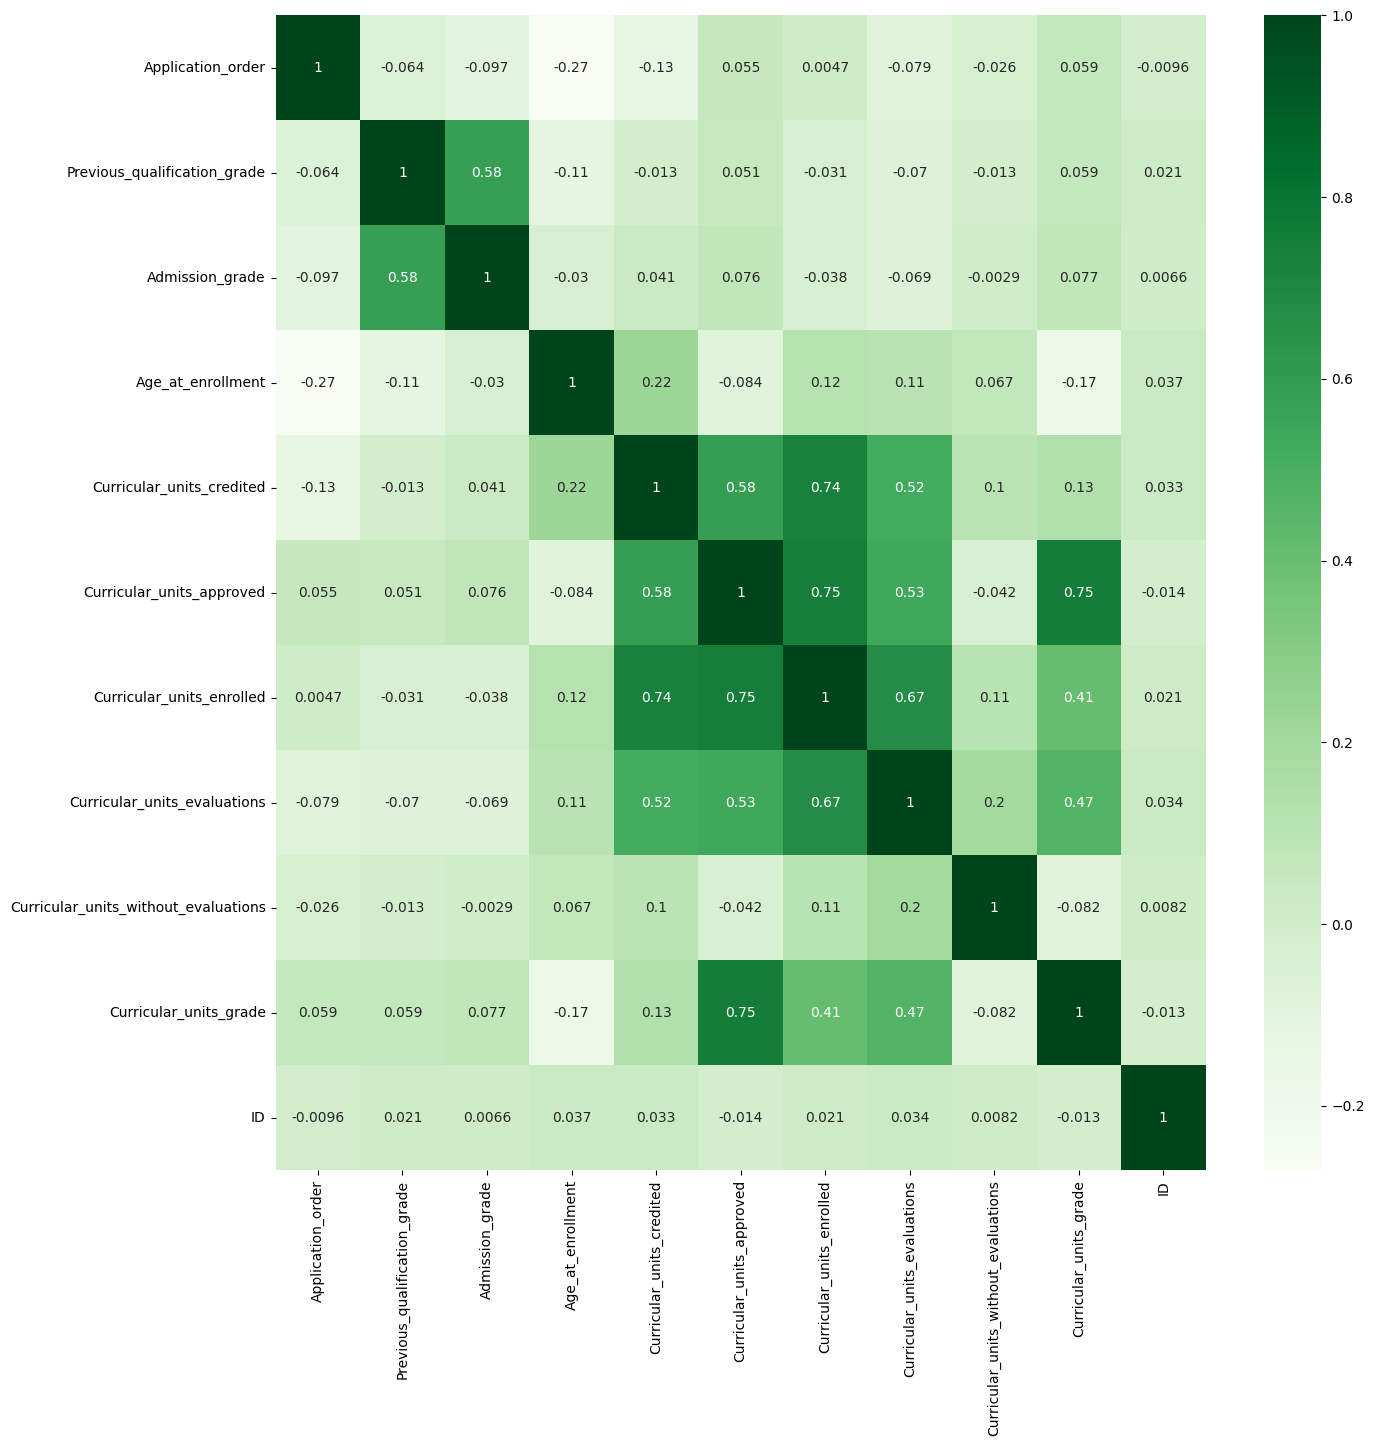

In [102]:
# Menampilkan korelasi antar parameter data numerikal yang baru
corr = students_df_num.corr()
fig1 , ax1 = plt.subplots(figsize=(15 , 15))
sns.heatmap(corr ,annot= True , ax=ax1 , cmap= "Greens");

In [103]:
# Melihat deskripsi students_df_num
students_df_num.describe()

Application_order  Previous_qualification_grade  Admission_grade  \
count        4424.000000                   4424.000000      4424.000000   
mean            1.727848                    132.613314       126.978119   
std             1.313793                     13.188332        14.482001   
min             0.000000                     95.000000        95.000000   
25%             1.000000                    125.000000       117.900000   
50%             1.000000                    133.100000       126.100000   
75%             2.000000                    140.000000       134.800000   
max             9.000000                    190.000000       190.000000   

       Age_at_enrollment  Curricular_units_credited  \
count        4424.000000                4424.000000   
mean           23.265145                   1.251808   
std             7.587816                   4.220239   
min            17.000000                   0.000000   
25%            19.000000                   0.000000   
50%            20.000000                   0.000000   
75%            25.000000                   0.000000   
max            70.000000                  39.000000   

       Curricular_units_approved  Curricular_units_enrolled  \
count                4424.000000                4424.000000   
mean                    9.142405                  12.502712   
std                     5.960612                   4.608821   
min                     0.000000                   0.000000   
25%                     5.000000                  10.000000   
50%                    10.000000                  12.000000   
75%                    12.000000                  14.000000   
max                    43.000000                  46.000000   

       Curricular_units_evaluations  Curricular_units_without_evaluations  \
count                   4424.000000                           4424.000000   
mean                      16.362342                              0.287975   
std                        7.664986                              1.285682   
min                        0.000000                              0.000000   
25%                       13.000000                              0.000000   
50%                       16.000000                              0.000000   
75%                       20.000000                              0.000000   
max                       72.000000                             24.000000   

       Curricular_units_grade           ID  
count             4424.000000  4424.000000  
mean                10.435514  2211.500000  
std                  4.818530  1277.243125  
min                  0.000000     0.000000  
25%                 11.000000  1105.750000  
50%                 12.250000  2211.500000  
75%                 13.266667  3317.250000  
max                 18.283654  4423.000000

In [104]:
# Drop kolom numerikal pada students_df
students_df = students_df.drop(columns=["Application_order", "Previous_qualification_grade", "Admission_grade",
                                        "Age_at_enrollment", "Unemployment_rate", "Inflation_rate", "GDP",
                                        "Curricular_units_1st_sem_credited", "Curricular_units_1st_sem_approved",
                                        "Curricular_units_1st_sem_enrolled", "Curricular_units_1st_sem_evaluations",
                                        "Curricular_units_1st_sem_without_evaluations", "Curricular_units_1st_sem_grade",
                                        "Curricular_units_2nd_sem_credited", "Curricular_units_2nd_sem_approved",
                                        "Curricular_units_2nd_sem_enrolled", "Curricular_units_2nd_sem_evaluations",
                                        "Curricular_units_2nd_sem_without_evaluations", "Curricular_units_2nd_sem_grade"])

In [105]:
# Menambahkan ID pada students_df_num
students_df_num["ID"] = students_df_num.index

In [106]:
students_df = pd.merge(students_df, students_df_num,how="outer", on="ID")
students_df.head()

Marital_status  Application_mode  Course  Daytime_evening_attendance  \
0               1                17     171                           1   
1               1                15    9254                           1   
2               1                 1    9070                           1   
3               1                17    9773                           1   
4               2                39    8014                           0   

   Previous_qualification  Nacionality  Mothers_qualification  \
0                       1            1                     19   
1                       1            1                      1   
2                       1            1                     37   
3                       1            1                     38   
4                       1            1                     37   

   Fathers_qualification  Mothers_occupation  Fathers_occupation  ...  \
0                     12                   5                   9  ...   
1                      3                   3                   3  ...   
2                     37                   9                   9  ...   
3                     37                   5                   3  ...   
4                     38                   9                   9  ...   

   Application_order  Previous_qualification_grade  Admission_grade  \
0                  5                         122.0            127.3   
1                  1                         160.0            142.5   
2                  5                         122.0            124.8   
3                  2                         122.0            119.6   
4                  1                         100.0            141.5   

   Age_at_enrollment  Curricular_units_credited  Curricular_units_approved  \
0                 20                          0                          0   
1                 19                          0                         12   
2                 19                          0                          0   
3                 20                          0                         11   
4                 45                          0                         11   

   Curricular_units_enrolled Curricular_units_evaluations  \
0                          0                            0   
1                         12                           12   
2                         12                            0   
3                         12                           18   
4                         12                           15   

   Curricular_units_without_evaluations  Curricular_units_grade  
0                                     0                0.000000  
1                                     0               13.833333  
2                                     0                0.000000  
3                                     0               12.914286  
4                                     0               12.666667  

[5 rows x 29 columns]

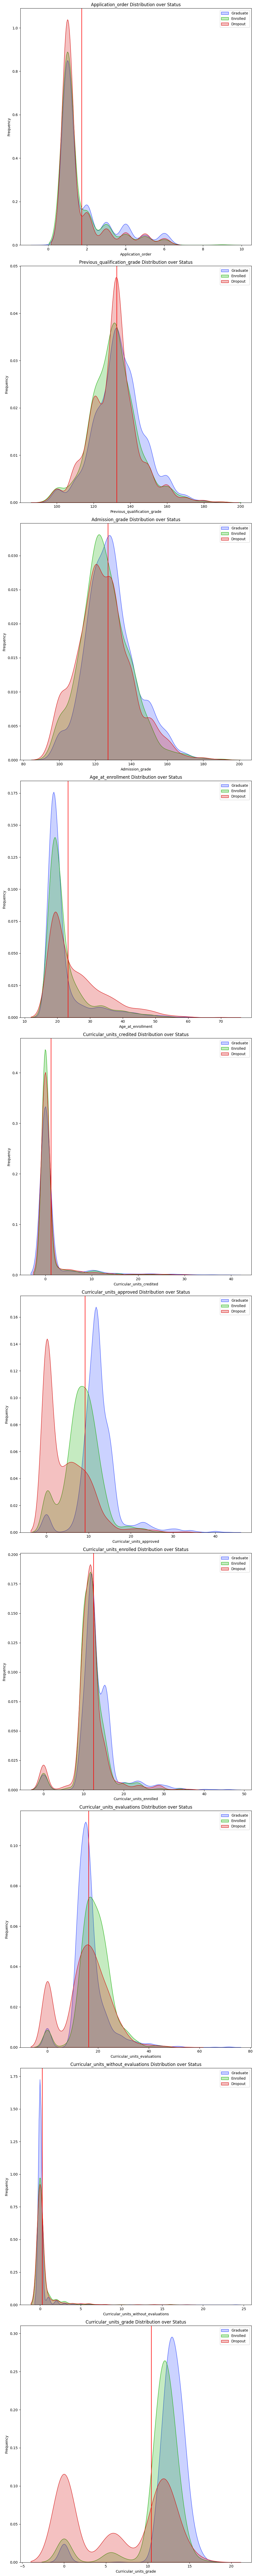

In [107]:
# Menampilkan kembali sebaran data numerikal yang baru
hist_graph(
    features=students_df_num.drop(columns =["ID"]).columns,
    data=students_df,
    segment_feature="Status"
)

#### Kesimpulan analisis data numerikal

Berikut kesimpulan analisis data numerikal :
1. Berdasarkan uji ANOVA terdapat 3 parameter yang dianggap tidak memiliki keterkaitan dengan Status mahasiswa yaitu parameter Inflation_rate, GDP, dan unemployment_rate sehingga data tersebut tidak digunakan dalam pembuatan model machine learning.
2. Berdasarkan hasil korelasi antar parameter numerikal dapat dilakukan feature engineering pada parameter curricular unit masing-masing semester.
3. Untuk sementara ini berdasarkan grafik sebarannya, parameter yang menghasilkan nilai sebaran variatif berdasarkan status mahasiswa adalah parameter Curricular_units_approved, Curricular_units_evaluations, dan curricular_units_grade.
4. Berdasarkan uji anova nilai P-value paling kecil diperoleh parameter Curricular_units_grade, Curricular_units_approved, Age_at_enrollment, dan Curricular_units_evaluation, dan Curricular_units_credited. Semakin kecil nilai P-Value semakin parameter tersebut berpengaruh pada kategorisasi status mahasiswa.
5. Parameter numerikal yang akhirnya digunakan dalam melatih model adalah sebagai berikut:

    - Application_order,
    - Previous_qualification_grade,
    - Admission_grade,
    - Age_at_enrollment,
    - Curricular_units_credited,
    - Curricular_units_approved,
    - Curricular_units_enrolled,
    - Curricular_units_evaluations,
    - Curricular_units_without_evaluations,
    - Curricular_units_grade

### Eksplorasi dan Analisis Data Categorical

Selanjutnya kita akan menganalisis data categorical. Pertama kita akan melihat sebaran data categorical berdasarkan status mahasiswa menggunakan helper function bar_graph() sebagai berikut

In [108]:
# Helper function bar_graph
def bar_graph(features, data, segment_feature):
    fig, ax = plt.subplots(len(segment_feature), 1,figsize=(10,100))

    for i, column in enumerate(data[segment_feature]):
        sns.countplot( data=data, y=features, hue=column, orient= "h", alpha=.6, ax=ax[i])
        ax[i].set_ylabel("Status")
        ax[i].set_title(f"Status by {column} ")
        ax[i].legend()


    plt.tight_layout()
    plt.show()

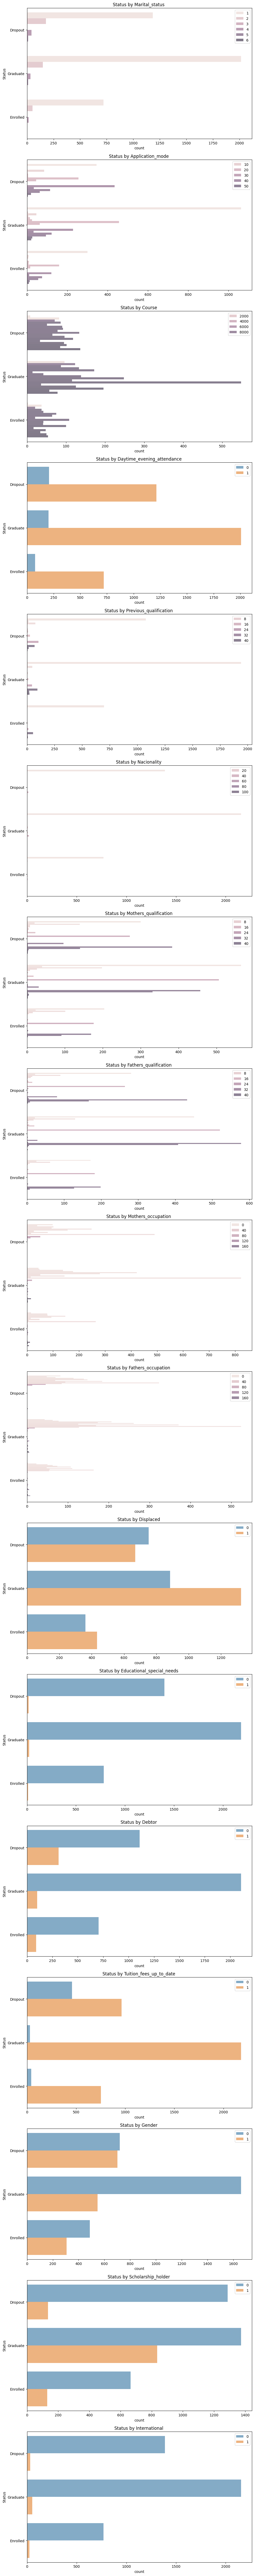

In [109]:
# Menampilkan grafik bar chart dari masing-masing parameter data kategorikal
bar_graph(
    features="Status",
    data=students_df,
    segment_feature=students_df_cat.columns
)

Pada grafik di atas ada beberapa pencilan dari masing-masing parameter. Pencilan tersebut harus diatasi bisa dengan menghapus data atau membuat class baru. Menghapus data akan mengurangi jumlah data sehingga pada kali ini akan dilakukan pembuat class baru. Sebelumnya harus dilakukan uji kardinalitas. Uji kardinalitas dapat menentukan seberapa mudah data dapat digunakan untuk melatih model. Kardinalitas yang tinggi ditunjukkan dari jumlah class yang banyak.

In [110]:
# Uji Kardinalitas
students_df_cat.nunique().sort_values()

International                  2
Gender                         2
Tuition_fees_up_to_date        2
Daytime_evening_attendance     2
Debtor                         2
Educational_special_needs      2
Displaced                      2
Scholarship_holder             2
Marital_status                 6
Previous_qualification        17
Course                        17
Application_mode              18
Nacionality                   21
Mothers_qualification         29
Mothers_occupation            32
Fathers_qualification         34
Fathers_occupation            46
dtype: int64

Berdasarkan grafik sebaran dan uji kardinalitas beberapa parameter akan dilakukan pengelompokan ulang seperti Marital_status, Course, Previous_application, Application_mode, Nacionality, Mothers_qualification, Mothers_ocupation, Fathers_qualification, Fathers_occupation.



#### Marital Status

Untuk marital_status kita akan membaginya menjadi 2 classes yaitu Single dan In Relationship:

Single: 1 – single  3 – widower 4 – divorced 6 – legally separated

In Relationship: 2 – married 5 – facto union


In [111]:
# Menghitung masing-masing jumlah data berdasarkan class dari Marital_status
students_df_cat["Marital_status"].value_counts()

Marital_status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64

In [112]:
# Mengelompokan ke dalam class baru
single = ["1", "3", "4", "6"]
relationship = ["2", "5"]

for single in single:
  students_df_cat["Marital_status"] = np.where(students_df_cat["Marital_status"] == single, "Single", students_df_cat["Marital_status"])

for relationship in relationship:
  students_df_cat["Marital_status"] = np.where(students_df_cat["Marital_status"] == relationship, "In Relationship", students_df_cat["Marital_status"])

#### Course

Sebelum pengelompokan class Course menjadi class baru, dilakukan perhitungan untuk jumlah data masing-masing class. Terdapat beberapa pencilan untuk class lama sehingga untuk Course akan dilakukan pengelompona masing masing course menjadi 6 class yaitu
- basic_course : 9853 - Basic Education
- technology and engineering: 33 - Biofuel Production Technologies 9119 - Informatics Engineering
- design and creativity: 171 - Animation and Multimedia Design 9070 - Communication Design
- health and care: 9085 - Veterinary Nursing 9500 - Nursing 9556 - Oral Hygiene
- social services and management: 8014 - Social Service (evening attendance) 9147 - Management 9238 - Social Service 670 - Advertising and Marketing Management 9773 - Journalism and Communication 9991 - Management (evening attendance)
- agriculture and environment: 9003 - Agronomy 9130 - Equinculture 9254 - Tourism

In [113]:
# Mengecek jumlah masing-masing course
students_df_cat["Course"].value_counts()

Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64

In [114]:
# mengelompokkan ke class baru
basic_course = ["9853"]
tech_engineering = ["33", "9119"]
design_creativity = ["171", "9070"]
healthcare = ["9085",  "9500" , "9556"]
social_services_management = ["8014", "9147", "9238", "9670", "9991", "9773"]
agriculture_environment= ["9003", "9130", "9254"]


for basic_course in basic_course:
  students_df_cat["Course"] = np.where(students_df_cat["Course"] == basic_course,
                                                      "Basic Education", students_df_cat["Course"])

for tech_engineering in tech_engineering:
  students_df_cat["Course"] = np.where(students_df_cat["Course"] == tech_engineering,
                                                      "Technology and Engineering", students_df_cat["Course"])

for design_creativity in design_creativity:
  students_df_cat["Course"] = np.where(students_df_cat["Course"] == design_creativity,
                                                      "Design and Creativity", students_df_cat["Course"])

for healthcare in healthcare:
  students_df_cat["Course"] = np.where(students_df_cat["Course"] == healthcare,
                                                      "Health and Care", students_df_cat["Course"])

for social_services_management in social_services_management:
  students_df_cat["Course"] = np.where(students_df_cat["Course"] == social_services_management,
                                                       "Social Services and Management", students_df_cat["Course"])

for agriculture_environment in agriculture_environment:
  students_df_cat["Course"] = np.where(students_df_cat["Course"] == agriculture_environment,
                                                      "Agriculture and Environtment", students_df_cat["Course"])

#### Previous_qualification

Untuk Previous_qualification kita akan mengelompokan menjadi 7 class yaitu
- Basic education
- Secondary education
- Degree
- Bachelor Degree
- Master
- Doctor
- Frequently Higher Degree

In [115]:
# Melihat jumlah masing-masing class dari Previous_qualification
students_df_cat["Previous_qualification"].value_counts()

Previous_qualification
1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
5        1
14       1
Name: count, dtype: int64

In [116]:
# Mengelompokkan ke dalam class baru
basic_edu = ["9", "10", "11", "12", "14", "15", "19", "38"]
second_edu = ["1"]
degree = ["3", "39", "40"]
bachelor = ["2", "42"]
master = ["4", "43"]
doctor = ["5"]
frequent= ["6"]

for basic_edu in basic_edu:
  students_df_cat["Previous_qualification"] = np.where(students_df_cat["Previous_qualification"] == basic_edu, "01", students_df_cat["Previous_qualification"])

for second_edu in second_edu:
  students_df_cat["Previous_qualification"] = np.where(students_df_cat["Previous_qualification"] == second_edu, "02", students_df_cat["Previous_qualification"])

for degree in degree:
  students_df_cat["Previous_qualification"] = np.where(students_df_cat["Previous_qualification"] == degree, "03", students_df_cat["Previous_qualification"])

for bachelor in bachelor:
  students_df_cat["Previous_qualification"] = np.where(students_df_cat["Previous_qualification"] == bachelor, "04", students_df_cat["Previous_qualification"])

for master in master:
  students_df_cat["Previous_qualification"] = np.where(students_df_cat["Previous_qualification"] == master, "05", students_df_cat["Previous_qualification"])

for doctor in doctor:
  students_df_cat["Previous_qualification"] = np.where(students_df_cat["Previous_qualification"] == doctor, "06", students_df_cat["Previous_qualification"])

for frequent in frequent:
  students_df_cat["Previous_qualification"] = np.where(students_df_cat["Previous_qualification"] == frequent, "07", students_df_cat["Previous_qualification"])


#### Application mode

Untuk Application_mode kita akan mengelompokan menjadi 6 class:
- General Contingent
- Special Contingent
- International
- Transfer and Change
- Specific ordinances
- Other

In [117]:
# Menghitung jumlah dari masing-masing class
students_df_cat["Application_mode"].value_counts()

Application_mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64

In [118]:
# mengelompokkan ke class baru
general_contingent = ["1", "17", "18"]
special_contingent = ["5", "16"]
international = ["15", "57"]
transfer_and_change = ["42",  "43" , "51"]
specific_ordinances = ["2", "10", "26", "27"]
other_mode = ["7", "39", "44", "53"]

for general_contingent in general_contingent:
  students_df_cat["Application_mode"] = np.where(students_df_cat["Application_mode"] == general_contingent,
                                                      "General Continent", students_df_cat["Application_mode"])

for special_contingent in special_contingent:
  students_df_cat["Application_mode"] = np.where(students_df_cat["Application_mode"] == special_contingent,
                                                      "Special Contingent", students_df_cat["Application_mode"])

for international in international:
  students_df_cat["Application_mode"] = np.where(students_df_cat["Application_mode"] == international,
                                                      "International", students_df_cat["Application_mode"])

for transfer_and_change in transfer_and_change:
  students_df_cat["Application_mode"] = np.where(students_df_cat["Application_mode"] == transfer_and_change,
                                                      "Transfer and Change", students_df_cat["Application_mode"])

for specific_ordinances in specific_ordinances:
  students_df_cat["Application_mode"] = np.where(students_df_cat["Application_mode"] == specific_ordinances,
                                                       "Spesific Ordinances", students_df_cat["Application_mode"])

for other_mode in other_mode:
  students_df_cat["Application_mode"] = np.where(students_df_cat["Application_mode"] == other_mode,
                                                      "Other", students_df_cat["Application_mode"])

#### Nacionality

Untuk Nacionality pertama kode negara akan diubah menjadi berformat ISO untuk selanjutnya disimpan pada kolom Country. Selanjutnya dari masing-masing negara akan dikelompokan berdasarkan benua.

In [119]:
# Melihat jumlah dari masing-masing class Nacionality
students_df_cat["Nacionality"].value_counts()

Nacionality
1      4314
41       38
26       14
22       13
6        13
24        5
100       3
11        3
103       3
21        2
101       2
62        2
25        2
2         2
105       2
32        1
13        1
109       1
108       1
14        1
17        1
Name: count, dtype: int64

In [120]:
# Membuat kolom country yang merupakan konversi kode negara ke ISO dari Nacionality
students_df_cat["Country"] = students_df_cat["Nacionality"].apply(lambda x: "PT" if x == "1"
                                                                  else ("DE" if x == "2"
                                                                        else ("ES" if x == "6"
                                                                              else ("IT" if x == "11"
                                                                                    else ("NL" if x == "13"
                                                                                          else ("GB" if x == "14"
                                                                                                else ("LT" if x == "17"
                                                                                                      else ("AO" if x == "21"
                                                                                                            else ("CV" if x == "22"
                                                                                                                  else ("GN" if x == "24"
                                                                                                                        else ("MZ" if x == "25"
                                                                                                                              else ("ST" if x == "26"
                                                                                                                                    else ("TR" if x == "32"
                                                                                                                                          else ("BR" if x == "41"
                                                                                                                                                else ("RO" if x == "62"
                                                                                                                                                      else ("MD" if x == "100"
                                                                                                                                                            else ("MX" if x == "101"
                                                                                                                                                                  else ("UA" if x == "103"
                                                                                                                                                                        else ("RU" if x == "105"
                                                                                                                                                                              else ("CU" if x == "108"
                                                                                                                                                                                    else "CO"))))))))))))))))))) )

In [121]:
# Helper function untuk mengkonversi kode negara menjadi benua
def country_to_continent(country):
    country_continent_code = pc.country_alpha2_to_continent_code(country)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [122]:
# Membuat parameter baru continent
students_df_cat["continent"] = students_df_cat["Country"].apply(lambda x: country_to_continent(x))
students_df_cat["continent"].value_counts()

continent
Europe           4345
South America      39
Africa             36
North America       3
Asia                1
Name: count, dtype: int64

#### Mothers_qualification

Pengelompokan pada Mothers_qualification sama dengan pada previous qualification hanya saja ditambah class untuk yang tidak memiliki riwayat pendidikan sama sekali.

In [123]:
# Melihat jumlah dari masing-masing class
students_df_cat["Mothers_qualification"].value_counts()

Mothers_qualification
1     1069
37    1009
19     953
38     562
3      438
34     130
2       83
4       49
12      42
5       21
40       9
9        8
39       8
41       6
6        4
42       4
43       4
29       3
10       3
11       3
36       3
35       3
30       3
14       2
18       1
22       1
27       1
26       1
44       1
Name: count, dtype: int64

In [124]:
# Mengelompokan ke class baru
motno_edu = ["34", "35"]
motbasic_edu = [ "36", "37", "38"]
motsecond_edu = ["1", "9", "10", "11", "12", "14", "18", "19", "22", "26", "27", "29", "30"]
motdegree = ["3", "40"]
motbachelor = ["2"]
motmaster = ["4", "43"]
motdoctor = ["5", "44"]
motfrequent= ["6", "39", "41", "42"]

for motno_edu in motno_edu:
  students_df_cat["Mothers_qualification"] = np.where(students_df_cat["Mothers_qualification"] == motno_edu,
                                                      "00", students_df_cat["Mothers_qualification"])

for motbasic_edu in motbasic_edu:
  students_df_cat["Mothers_qualification"] = np.where(students_df_cat["Mothers_qualification"] == motbasic_edu,
                                                      "01", students_df_cat["Mothers_qualification"])

for motsecond_edu in motsecond_edu:
  students_df_cat["Mothers_qualification"] = np.where(students_df_cat["Mothers_qualification"] == motsecond_edu,
                                                      "02", students_df_cat["Mothers_qualification"])

for motdegree in motdegree:
  students_df_cat["Mothers_qualification"] = np.where(students_df_cat["Mothers_qualification"] == motdegree,
                                                       "03", students_df_cat["Mothers_qualification"])

for motbachelor in motbachelor:
  students_df_cat["Mothers_qualification"] = np.where(students_df_cat["Mothers_qualification"] == motbachelor,
                                                      "04", students_df_cat["Mothers_qualification"])

for motmaster in motmaster:
  students_df_cat["Mothers_qualification"] = np.where(students_df_cat["Mothers_qualification"] == motmaster,
                                                       "05", students_df_cat["Mothers_qualification"])

for motdoctor in motdoctor:
  students_df_cat["Mothers_qualification"] = np.where(students_df_cat["Mothers_qualification"] == motdoctor,
                                                      "06", students_df_cat["Mothers_qualification"])

for motfrequent in motfrequent:
  students_df_cat["Mothers_qualification"] = np.where(students_df_cat["Mothers_qualification"] == motfrequent,
                                                       "07", students_df_cat["Mothers_qualification"])


#### Father_qualification


Pengelompokan pada Fathers_qualification sama dengan pada Mothers_qualification

In [125]:
# Melihat jumlah dari masing-masing class
students_df_cat["Fathers_qualification"].value_counts()

Fathers_qualification
37    1209
19     968
1      904
38     702
3      282
34     112
2       68
4       39
12      38
39      20
5       18
11      10
36       8
9        5
40       5
22       4
30       4
14       4
29       3
35       2
41       2
43       2
10       2
6        2
26       2
25       1
27       1
33       1
44       1
20       1
42       1
18       1
13       1
31       1
Name: count, dtype: int64

In [126]:
# Mengelompokkan ke class baru
fatno_edu = ["34", "35"]
fatbasic_edu = ["36", "37", "38", "12"]
fatsecond_edu = ["1", "9", "10", "11", "13", "14","18","19", "20", "22", "25", "26", "27", "29", "30", "31", "33"]
fatdegree = ["3","40"]
fatbachelor = ["2"]
fatmaster = ["4", "43"]
fatdoctor = ["5", "44"]
fatfrequent= ["6", "39", "41", "42"]

for fatno_edu in fatno_edu:
  students_df_cat["Fathers_qualification"] = np.where(students_df_cat["Fathers_qualification"] == fatno_edu,
                                                      "00", students_df_cat["Fathers_qualification"])

for fatbasic_edu in fatbasic_edu:
  students_df_cat["Fathers_qualification"] = np.where(students_df_cat["Fathers_qualification"] == fatbasic_edu,
                                                      "01", students_df_cat["Fathers_qualification"])

for fatsecond_edu in fatsecond_edu:
  students_df_cat["Fathers_qualification"] = np.where(students_df_cat["Fathers_qualification"] == fatsecond_edu,
                                                      "02", students_df_cat["Fathers_qualification"])

for fatdegree in fatdegree:
  students_df_cat["Fathers_qualification"] = np.where(students_df_cat["Fathers_qualification"] == fatdegree,
                                                       "03", students_df_cat["Fathers_qualification"])

for fatbachelor in fatbachelor:
  students_df_cat["Fathers_qualification"] = np.where(students_df_cat["Fathers_qualification"] == fatbachelor,
                                                      "04", students_df_cat["Fathers_qualification"])

for fatmaster in fatmaster:
  students_df_cat["Fathers_qualification"] = np.where(students_df_cat["Fathers_qualification"] == fatmaster,
                                                       "05", students_df_cat["Fathers_qualification"])

for fatdoctor in fatdoctor:
  students_df_cat["Fathers_qualification"] = np.where(students_df_cat["Fathers_qualification"] == fatdoctor,
                                                      "06", students_df_cat["Fathers_qualification"])

for fatfrequent in fatfrequent:
  students_df_cat["Fathers_qualification"] = np.where(students_df_cat["Fathers_qualification"] == fatfrequent,
                                                       "07", students_df_cat["Fathers_qualification"])

#### Mothers_occupation

Untuk Mothers_occupation kita akan membagi menjadi 10 class yaitu
- Students
- Professionals and Specialists
- Intermediate Level Technicians and Professions
- Administrative Staff
- Service Workers and Sellers
- Agricultural and Forestry Workers
- Skilled Workers in Industry, Construction, and Craftsmen
- Unskilled Workers
- Armed Forces Professions
- Other

In [127]:
# Melihat jumlah dari masing-masing class lama
students_df_cat["Mothers_occupation"].value_counts()

Mothers_occupation
9      1577
4       817
5       530
3       351
2       318
7       272
0       144
1       102
6        91
90       70
8        36
191      26
99       17
194      11
141       8
123       7
144       6
175       5
192       5
193       4
134       4
10        4
143       3
151       3
132       3
152       2
122       2
153       2
173       1
125       1
131       1
171       1
Name: count, dtype: int64

In [128]:
# Mengelompokkan ke class baru
mot_stud = ["0"]
mot_prof = ["1", "2", "112", "122", "123", "125"]
mot_inter = ["3", "131", "132", "134", "143"]
mot_admin = ["4", "141", "144"]
mot_service = ["5", "151", "152", "153"]
mot_agri = ["6"]
mot_indus = ["7", "171", "172","173", "175"]
mot_install = ["8"]
mot_unskilled = ["9", "191", "192", "193", "194"]
mot_army = ["10"]
mot_ocu_other = ["90", "99"]

for mot_stud in mot_stud:
  students_df_cat["Mothers_occupation"] = np.where(students_df_cat["Mothers_occupation"] == mot_stud,
                                                      "Students", students_df_cat["Mothers_occupation"])

for mot_prof in mot_prof:
  students_df_cat["Mothers_occupation"] = np.where(students_df_cat["Mothers_occupation"] == mot_prof,
                                                      "Professionals and Specialists", students_df_cat["Mothers_occupation"])

for mot_inter in mot_inter:
  students_df_cat["Mothers_occupation"] = np.where(students_df_cat["Mothers_occupation"] == mot_inter,
                                                      "Intermediate Level Technicians and Professions", students_df_cat["Mothers_occupation"])

for mot_admin in mot_admin:
  students_df_cat["Mothers_occupation"] = np.where(students_df_cat["Mothers_occupation"] == mot_admin,
                                                       "Administrative Staff", students_df_cat["Mothers_occupation"])

for mot_service in mot_service:
  students_df_cat["Mothers_occupation"] = np.where(students_df_cat["Mothers_occupation"] == mot_service,
                                                      "Service Workers and Sellers", students_df_cat["Mothers_occupation"])

for mot_agri in mot_agri:
  students_df_cat["Mothers_occupation"] = np.where(students_df_cat["Mothers_occupation"] == mot_agri,
                                                       "Agricultural and Forestry Workers", students_df_cat["Mothers_occupation"])

for mot_indus in mot_indus:
  students_df_cat["Mothers_occupation"] = np.where(students_df_cat["Mothers_occupation"] == mot_indus,
                                                      "Skilled Workers in Industry, Construction, and Craftsmen", students_df_cat["Mothers_occupation"])

for mot_install in mot_install:
  students_df_cat["Mothers_occupation"] = np.where(students_df_cat["Mothers_occupation"] == mot_install,
                                                       "Installation and Machine Operators and Assembly Workers", students_df_cat["Mothers_occupation"])

for mot_unskilled in mot_unskilled:
  students_df_cat["Mothers_occupation"] = np.where(students_df_cat["Mothers_occupation"] == mot_unskilled,
                                                       "Unskilled Workers", students_df_cat["Mothers_occupation"])

for mot_army in mot_army:
  students_df_cat["Mothers_occupation"] = np.where(students_df_cat["Mothers_occupation"] == mot_army,
                                                      "Armed Forces Professions", students_df_cat["Mothers_occupation"])

for mot_ocu_other in mot_ocu_other:
  students_df_cat["Mothers_occupation"] = np.where(students_df_cat["Mothers_occupation"] == mot_ocu_other,
                                                       "Other", students_df_cat["Mothers_occupation"])

#### Fathers_occupation

Fathers_occupation memiliki class baru yang sama seperti Mothers_occupation

In [129]:
# Melihat jumlah masing-masing data class lama
students_df_cat["Fathers_occupation"].value_counts()

Fathers_occupation
9      1010
7       666
5       516
4       386
3       384
8       318
10      266
6       242
2       197
1       134
0       128
90       65
99       19
193      15
144       8
171       8
192       6
163       5
103       4
175       4
135       3
183       3
152       3
123       3
181       3
194       2
182       2
112       2
151       2
172       2
122       2
102       2
153       1
101       1
114       1
174       1
141       1
132       1
134       1
143       1
131       1
161       1
195       1
121       1
124       1
154       1
Name: count, dtype: int64

In [130]:
# mengelompokkan ke class baru
fat_stud = ["0"]
fat_prof = ["1", "2", "112", "121", "122", "123", "124"]
fat_inter = ["3",  "114", "131", "132", "134", "135", "143"]
fat_admin = ["4", "141", "144"]
fat_service = ["5", "151", "152", "153", "154", "195"]
fat_agri = ["6", "161", "163"]
fat_indus = ["7", "171", "172", "174", "175"]
fat_install = ["8", "181", "182", "183"]
fat_unskilled = ["9", "192", "193", "194"]
fat_army = ["10", "101", "102", "103"]
fat_ocu_other = ["90", "99"]

for fat_stud in fat_stud:
  students_df_cat["Fathers_occupation"] = np.where(students_df_cat["Fathers_occupation"] == fat_stud,
                                                      "Students", students_df_cat["Fathers_occupation"])

for fat_prof in fat_prof:
  students_df_cat["Fathers_occupation"] = np.where(students_df_cat["Fathers_occupation"] == fat_prof,
                                                      "Professionals and Specialists", students_df_cat["Fathers_occupation"])

for fat_inter in fat_inter:
  students_df_cat["Fathers_occupation"] = np.where(students_df_cat["Fathers_occupation"] == fat_inter,
                                                      "Intermediate Level Technicians and Professions", students_df_cat["Fathers_occupation"])

for fat_admin in fat_admin:
  students_df_cat["Fathers_occupation"] = np.where(students_df_cat["Fathers_occupation"] == fat_admin,
                                                       "Administrative Staff", students_df_cat["Fathers_occupation"])

for fat_service in fat_service:
  students_df_cat["Fathers_occupation"] = np.where(students_df_cat["Fathers_occupation"] == fat_service,
                                                      "Service Workers and Sellers", students_df_cat["Fathers_occupation"])

for fat_agri in fat_agri:
  students_df_cat["Fathers_occupation"] = np.where(students_df_cat["Fathers_occupation"] == fat_agri,
                                                       "Agricultural and Forestry Workers", students_df_cat["Fathers_occupation"])

for fat_indus in fat_indus:
  students_df_cat["Fathers_occupation"] = np.where(students_df_cat["Fathers_occupation"] == fat_indus,
                                                      "Skilled Workers in Industry, Construction, and Craftsmen", students_df_cat["Fathers_occupation"])

for fat_install in fat_install:
  students_df_cat["Fathers_occupation"] = np.where(students_df_cat["Fathers_occupation"] == fat_install,
                                                       "Installation and Machine Operators and Assembly Workers", students_df_cat["Fathers_occupation"])

for fat_unskilled in fat_unskilled:
  students_df_cat["Fathers_occupation"] = np.where(students_df_cat["Fathers_occupation"] == fat_unskilled,
                                                       "Unskilled Workers", students_df_cat["Fathers_occupation"])

for fat_army in fat_army:
  students_df_cat["Fathers_occupation"] = np.where(students_df_cat["Fathers_occupation"] == fat_army,
                                                      "Armed Forces Professions", students_df_cat["Fathers_occupation"])

for fat_ocu_other in fat_ocu_other:
  students_df_cat["Fathers_occupation"] = np.where(students_df_cat["Fathers_occupation"] == fat_ocu_other,
                                                       "Other", students_df_cat["Fathers_occupation"])

Selanjutnya kita akan melihat kembali kardinalitas data yang sudah diolah dan sebaran dari data kategorikal berdasarkan status mahasiswa. Tingkat kardinalitasnya sudah menurun.

In [131]:
students_df_cat.nunique().sort_values()

Marital_status                 2
International                  2
Scholarship_holder             2
Daytime_evening_attendance     2
Gender                         2
Tuition_fees_up_to_date        2
Debtor                         2
Educational_special_needs      2
Displaced                      2
continent                      5
Course                         6
Application_mode               6
Previous_qualification         7
Fathers_qualification          8
Mothers_qualification          8
Mothers_occupation            11
Fathers_occupation            11
Nacionality                   21
Country                       21
dtype: int64

#### Melihat keterkaitan antara status mahasiswa dan data kategorikal

Untuk melihat keterkaitan antara status mahasiswa dan data categorical kita akan melihat nilai Cramer"s V statistic yang merupakan chi mean square. Semakin besar nilainya akan menunjukkan semakin parameter tersebut terkait satu sama lain. Perhitungan ini dilakukan dengan helper function result_cramers_v()

In [132]:
# Helper function untuk menghitung Cramer"s V value
def result_cramers_v(df, df_cat):
    df_cat["ID"] = df_cat.index
    data = pd.merge(df_cat, df, how="outer", on="ID")

    columns = df_cat.drop(columns = ["ID"]).columns
    for column in columns:
      confusion_matrix = pd.crosstab(data["Status"], data[column])
      value = confusion_matrix.values
      chi2 = ss.chi2_contingency(value)[0]
      n = value.sum()
      phi2 = chi2 / n
      r, k = value.shape
      phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
      rcorr = r - ((r - 1) ** 2) / (n - 1)
      kcorr = k - ((k - 1) ** 2) / (n - 1)
      cramers_v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
      print(f"Cramer V Value antara Status dan {column}: ", cramers_v)


In [133]:
result_cramers_v(students_df[["ID", "Status"]], students_df_cat)

Cramer V Value antara Status dan Marital_status:  0.0990344777801674
Cramer V Value antara Status dan Application_mode:  0.186828292973936
Cramer V Value antara Status dan Course:  0.17981516753919682
Cramer V Value antara Status dan Daytime_evening_attendance:  0.07775316241933414
Cramer V Value antara Status dan Previous_qualification:  0.12360624631945637
Cramer V Value antara Status dan Nacionality:  0.0257156316867445
Cramer V Value antara Status dan Mothers_qualification:  0.1225560129542323
Cramer V Value antara Status dan Fathers_qualification:  0.11481892291525876
Cramer V Value antara Status dan Mothers_occupation:  0.14214978327375566
Cramer V Value antara Status dan Fathers_occupation:  0.12605366342517685
Cramer V Value antara Status dan Displaced:  0.11227383474586672
Cramer V Value antara Status dan Educational_special_needs:  0.0
Cramer V Value antara Status dan Debtor:  0.24120654431476413
Cramer V Value antara Status dan Tuition_fees_up_to_date:  0.43098200971571177
C

Berdasarkan perhitungan Cramer"s V value diperoleh bahwa parameter International dan Educational_special_needs tidak memiliki pengaruh terhadap status. Selanjutnya parameter tersebut akan dihapus. Selain itu parameter Displaced, Nacionality, Country, dan continent juga memiliki Cramer"s V value yang kecil sehingga parameter ini akan dihapus. Data categorical kemudian digabungkan kembali ke students_df dan dilihat kembali grafik barchart masing-masing parameternya.

In [134]:
# Menghapus kolom yang tidak digunakan
students_df_cat = students_df_cat.drop(columns = ["Educational_special_needs",
                                                  "International",
                                                  "Nacionality",
                                                  "Displaced",
                                                  "Country",
                                                  "continent"])

In [135]:
# Menghapus kolom kategori students_df
students_df = students_df.drop(columns=["Marital_status", "Application_mode", "Course",
                              "Daytime_evening_attendance", "Previous_qualification",
                              "Nacionality", "Mothers_qualification", "Fathers_qualification",
                              "Mothers_occupation", "Fathers_occupation", "Displaced",
                              "Educational_special_needs", "Debtor", "Tuition_fees_up_to_date",
                              "Gender", "Scholarship_holder", "International"])

In [136]:
# Menggabungkan kembali ke students_df
students_df_cat["ID"] = students_df_cat.index
students_df = pd.merge(students_df, students_df_cat,how="outer", on="ID")
students_df

Status    ID  Application_order  Previous_qualification_grade  \
0      Dropout     0                  5                         122.0   
1     Graduate     1                  1                         160.0   
2      Dropout     2                  5                         122.0   
3     Graduate     3                  2                         122.0   
4     Graduate     4                  1                         100.0   
...        ...   ...                ...                           ...   
4419  Graduate  4419                  6                         125.0   
4420   Dropout  4420                  2                         120.0   
4421   Dropout  4421                  1                         154.0   
4422  Graduate  4422                  1                         180.0   
4423  Graduate  4423                  1                         152.0   

      Admission_grade  Age_at_enrollment  Curricular_units_credited  \
0               127.3                 20                          0   
1               142.5                 19                          0   
2               124.8                 19                          0   
3               119.6                 20                          0   
4               141.5                 45                          0   
...               ...                ...                        ...   
4419            122.2                 19                          0   
4420            119.0                 18                          0   
4421            149.5                 30                          0   
4422            153.8                 20                          0   
4423            152.0                 22                          0   

      Curricular_units_approved  Curricular_units_enrolled  \
0                             0                          0   
1                            12                         12   
2                             0                         12   
3                            11                         12   
4                            11                         12   
...                         ...                        ...   
4419                         10                         12   
4420                          8                         12   
4421                          8                         15   
4422                         10                         10   
4423                         12                         12   

      Curricular_units_evaluations  ...  Daytime_evening_attendance  \
0                                0  ...                           1   
1                               12  ...                           1   
2                                0  ...                           1   
3                               18  ...                           1   
4                               15  ...                           0   
...                            ...  ...                         ...   
4419                            15  ...                           1   
4420                            12  ...                           1   
4421                            17  ...                           1   
4422                            11  ...                           1   
4423                            14  ...                           1   

      Previous_qualification Mothers_qualification Fathers_qualification  \
0                         02                    02                    01   
1                         02                    02                    03   
2                         02                    01                    01   
3                         02                    01                    01   
4                         02                    01                    01   
...                      ...                   ...                   ...   
4419                      02                    02                    02   
4420                      02                    02                    02

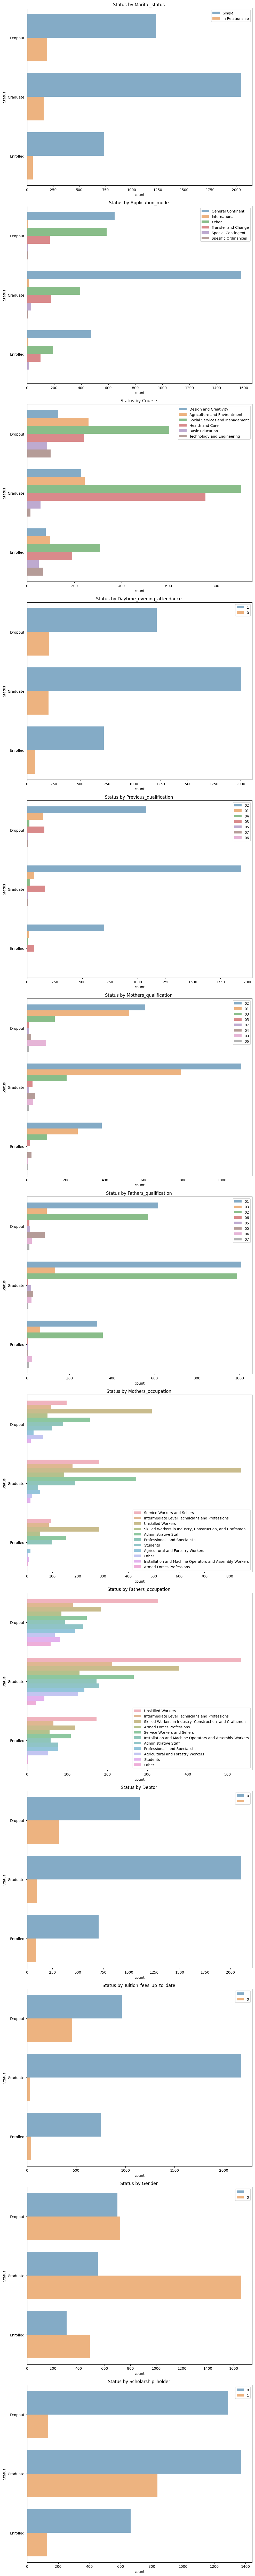

In [137]:
# Menampilkan kembali barchart
bar_graph(
    features="Status",
    data=students_df,
    segment_feature=students_df_cat.drop(columns = ["ID"]).columns
)

#### Kesimpulan Analisis Data Categorical

Berdasarkan uji Crammer V dan grafik sebaran
- Mahasiswa dropout paling banyak berstatus single
- Mahasiswa dropout kebanyakan dari general continent, meskipun persebarannya cukup merata antar application mode
- Jumlah mahasiswa yang graduates dari masing-masing jurusan jumlahnya lebih banyak dibanding yang dropout kecuali pada jurusan technology dan engineering, basic education
- Berdasarkan kategori daytime/evening attendance sebarannya sebanding antara ketiga kategori. Sebagian besar mahasiswa yang datang evening mengalami dropout.
- Sebaran berdasarkan previous_qualification, sebarannya hampir merata dari beberapa status mahasiswa. Jumlah mahasiswa dropout terbanyak dari lulusan secondary education (02)
- Sebaran berdasarkan mothers_qualification, sebarannya hampir merata dari beberapa status mahasiswa. Jumlah mahasiswa dropout terbanyak dari lulusan secondary education (01)
- Sebaran berdasarkan fathers_qualification, sebarannya hampir merata dari beberapa status mahasiswa. Jumlah mahasiswa dropout terbanyak dari lulusan basic education (01)
- Sebaran berdasarkan mothers_occupation, sebarannya hampir merata dari beberapa status mahasiswa. Jumlah mahasiswa dropout terbanyak dari yang ibunya memiliki pekerjaan unskilled workers
- Sebaran berdasarkan fathers_occupation, sebarannya hampir merata dari beberapa status mahasiswa. Jumlah mahasiswa dropout terbanyak dari yang ibunya memiliki pekerjaan unskilled workers.
- Kebanyakan mahasiswa yang dropout tidak memiliki tagihan hutang. Akan tetapi, sebagian besar yang memiliki tagihan hutang mengalami dropout.
- Tagihan pembayaran yang belum terupdate paling banyak dari mahasiswa dropout
- Sebaran gender mahasiswa dropout hampir sama, pada masing-masing kategori status mahasiswa, jumlah tersebarnya adalah laki-laki.
- Sebagian besar mahasiswa dropout tidak memiliki beasiswa. Sebagian besar yang memiliki beasiswa berhasil lulus.
- Nilai Cramer Value terbesar diperoleh parameter Tuitious_fees_up_to_date, Scholarship_holder, Debtor, dan Gender. Parameter ini yang dianggap paling berkaitan dengan status mahasiswa.

Parameter data kategori yang akhirnya digunakan adalah
- Marital_status
- Application_mode
- Course
- Daytime_evening_attendance
- Previous_qualification
- Mothers_qualification
- Fathers_qualification
- Mothers_occupation
- Fathers_occupation
- Debtor
- Tuition_fees_up_to_date
- Gender
- Scholarship_holder

### Menyimpan data menjadi CSV untuk dashboard dan analisis


Data kemudian disimpan dalam berkas csv untuk pembuatan dashboard bisnis di Looker studio

In [138]:
# Menampilkan students_df
students_df.head()


Status  ID  Application_order  Previous_qualification_grade  \
0   Dropout   0                  5                         122.0   
1  Graduate   1                  1                         160.0   
2   Dropout   2                  5                         122.0   
3  Graduate   3                  2                         122.0   
4  Graduate   4                  1                         100.0   

   Admission_grade  Age_at_enrollment  Curricular_units_credited  \
0            127.3                 20                          0   
1            142.5                 19                          0   
2            124.8                 19                          0   
3            119.6                 20                          0   
4            141.5                 45                          0   

   Curricular_units_approved  Curricular_units_enrolled  \
0                          0                          0   
1                         12                         12   
2                          0                         12   
3                         11                         12   
4                         11                         12   

   Curricular_units_evaluations  ...  Daytime_evening_attendance  \
0                             0  ...                           1   
1                            12  ...                           1   
2                             0  ...                           1   
3                            18  ...                           1   
4                            15  ...                           0   

   Previous_qualification Mothers_qualification Fathers_qualification  \
0                      02                    02                    01   
1                      02                    02                    03   
2                      02                    01                    01   
3                      02                    01                    01   
4                      02                    01                    01   

                               Mothers_occupation  \
0                     Service Workers and Sellers   
1  Intermediate Level Technicians and Professions   
2                               Unskilled Workers   
3                     Service Workers and Sellers   
4                               Unskilled Workers   

                               Fathers_occupation Debtor  \
0                               Unskilled Workers      0   
1  Intermediate Level Technicians and Professions      0   
2                               Unskilled Workers      0   
3  Intermediate Level Technicians and Professions      0   
4                               Unskilled Workers      0   

  Tuition_fees_up_to_date Gender Scholarship_holder  
0                       1      1                  0  
1                       0      1                  0  
2                       0      1                  0  
3                       1      0                  0  
4                       1      0                  0  

[5 rows x 25 columns]

In [139]:
# Kolom students_df
students_df.columns

Index(['Status', 'ID', 'Application_order', 'Previous_qualification_grade',
       'Admission_grade', 'Age_at_enrollment', 'Curricular_units_credited',
       'Curricular_units_approved', 'Curricular_units_enrolled',
       'Curricular_units_evaluations', 'Curricular_units_without_evaluations',
       'Curricular_units_grade', 'Marital_status', 'Application_mode',
       'Course', 'Daytime_evening_attendance', 'Previous_qualification',
       'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation',
       'Fathers_occupation', 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
       'Scholarship_holder'],
      dtype='object')

In [140]:
# Menyimpan students_df
students_df.to_csv("students_data.csv", index=False)

## Data Preparation / Preprocessing

Pada data preparation, digunakan dataframe students_model_df yang merupakan students_df yang tidak memiliki kolom ID.

In [141]:
students_model_df = students_df.drop(columns=["ID"], axis=1)
students_model_df.head()

Status  Application_order  Previous_qualification_grade  Admission_grade  \
0   Dropout                  5                         122.0            127.3   
1  Graduate                  1                         160.0            142.5   
2   Dropout                  5                         122.0            124.8   
3  Graduate                  2                         122.0            119.6   
4  Graduate                  1                         100.0            141.5   

   Age_at_enrollment  Curricular_units_credited  Curricular_units_approved  \
0                 20                          0                          0   
1                 19                          0                         12   
2                 19                          0                          0   
3                 20                          0                         11   
4                 45                          0                         11   

   Curricular_units_enrolled  Curricular_units_evaluations  \
0                          0                             0   
1                         12                            12   
2                         12                             0   
3                         12                            18   
4                         12                            15   

   Curricular_units_without_evaluations  ...  Daytime_evening_attendance  \
0                                     0  ...                           1   
1                                     0  ...                           1   
2                                     0  ...                           1   
3                                     0  ...                           1   
4                                     0  ...                           0   

  Previous_qualification Mothers_qualification Fathers_qualification  \
0                     02                    02                    01   
1                     02                    02                    03   
2                     02                    01                    01   
3                     02                    01                    01   
4                     02                    01                    01   

                               Mothers_occupation  \
0                     Service Workers and Sellers   
1  Intermediate Level Technicians and Professions   
2                               Unskilled Workers   
3                     Service Workers and Sellers   
4                               Unskilled Workers   

                               Fathers_occupation Debtor  \
0                               Unskilled Workers      0   
1  Intermediate Level Technicians and Professions      0   
2                               Unskilled Workers      0   
3  Intermediate Level Technicians and Professions      0   
4                               Unskilled Workers      0   

  Tuition_fees_up_to_date Gender Scholarship_holder  
0                       1      1                  0  
1                       0      1                  0  
2                       0      1                  0  
3                       1      0                  0  
4                       1      0                  0  

[5 rows x 24 columns]

### Data Numerical

Pada pemrosesan ini dilakukan scalling pada data yang sudah ditetapkan nilai minimal dan maksimalnya, menggunakan MinMaxScaler()
Penetapan nilai minimal dan maksimal berdasarkan keterangan dari pemiliki data sumber seperti:

- Application_order (0-9)
- Previous_qualification_grade (0-200)
- Admission_grade (0-200)
- Curricular_units_grade (0-20)

Sedangkan parameter lain berasal dari analisis data numerikal
- Age_at_enrollment (17-70)
- Curricular_units_credited (0-46)
- Curricular_units_approved (0-46)
- Curricular_units_enrolled (0-46)
- Curricular_units_evaluations (0-72)
- Curricular_units_without_evaluations (0-24)

In [142]:
# define students_model_num
students_model_num = students_model_df.select_dtypes(include=np.number)
students_model_num.columns

Index(['Application_order', 'Previous_qualification_grade', 'Admission_grade',
       'Age_at_enrollment', 'Curricular_units_credited',
       'Curricular_units_approved', 'Curricular_units_enrolled',
       'Curricular_units_evaluations', 'Curricular_units_without_evaluations',
       'Curricular_units_grade'],
      dtype='object')

In [143]:
# Helper function untuk mengaplikasikan MinMaxScaler
def fit_transform_num(data, min, max):
  Min_Max_Scaler = MinMaxScaler()
  scaller = Min_Max_Scaler.fit([[min] , [max]])
  scaller_data = scaller.transform(data)
  return scaller_data

In [144]:
# Mengaplikasikan MinMaxScaler
students_model_num[["Application_order"]] = fit_transform_num(students_model_num[["Application_order"]], 0., 9.)
students_model_num[["Previous_qualification_grade"]] = fit_transform_num(students_model_num[["Previous_qualification_grade"]], 0., 200.)
students_model_num[["Admission_grade"]] = fit_transform_num(students_model_num[["Admission_grade"]], 0., 200.)
students_model_num[["Age_at_enrollment"]] = fit_transform_num(students_model_num[["Age_at_enrollment"]], 17., 70.)
students_model_num[["Curricular_units_grade"]] = fit_transform_num(students_model_num[["Curricular_units_grade"]], 0., 20.)
students_model_num[["Curricular_units_credited"]] = fit_transform_num(students_model_num[["Curricular_units_credited"]], 0., 40.)
students_model_num[["Curricular_units_enrolled"]] = fit_transform_num(students_model_num[["Curricular_units_enrolled"]], 0., 52.)
students_model_num[["Curricular_units_approved"]] = fit_transform_num(students_model_num[["Curricular_units_approved"]], 0., 52.)
students_model_num[["Curricular_units_evaluations"]] = fit_transform_num(students_model_num[["Curricular_units_evaluations"]], 0., 72.)
students_model_num[["Curricular_units_without_evaluations"]] = fit_transform_num(students_model_num[["Curricular_units_without_evaluations"]], 0., 24.)
students_model_num.head()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/di

Application_order  Previous_qualification_grade  Admission_grade  \
0           0.555556                          0.61           0.6365   
1           0.111111                          0.80           0.7125   
2           0.555556                          0.61           0.6240   
3           0.222222                          0.61           0.5980   
4           0.111111                          0.50           0.7075   

   Age_at_enrollment  Curricular_units_credited  Curricular_units_approved  \
0           0.056604                        0.0                   0.000000   
1           0.037736                        0.0                   0.230769   
2           0.037736                        0.0                   0.000000   
3           0.056604                        0.0                   0.211538   
4           0.528302                        0.0                   0.211538   

   Curricular_units_enrolled  Curricular_units_evaluations  \
0                   0.000000                      0.000000   
1                   0.230769                      0.166667   
2                   0.230769                      0.000000   
3                   0.230769                      0.250000   
4                   0.230769                      0.208333   

   Curricular_units_without_evaluations  Curricular_units_grade  
0                                   0.0                0.000000  
1                                   0.0                0.691667  
2                                   0.0                0.000000  
3                                   0.0                0.645714  
4                                   0.0                0.633333

In [145]:
# Memasukan nilai yang sudah melewati proses scalling ke students_model_df
num_columns = students_model_num.columns
for num_column in num_columns:
  students_model_df[num_column] = students_model_num[num_column]
students_model_df.head()

Status  Application_order  Previous_qualification_grade  Admission_grade  \
0   Dropout           0.555556                          0.61           0.6365   
1  Graduate           0.111111                          0.80           0.7125   
2   Dropout           0.555556                          0.61           0.6240   
3  Graduate           0.222222                          0.61           0.5980   
4  Graduate           0.111111                          0.50           0.7075   

   Age_at_enrollment  Curricular_units_credited  Curricular_units_approved  \
0           0.056604                        0.0                   0.000000   
1           0.037736                        0.0                   0.230769   
2           0.037736                        0.0                   0.000000   
3           0.056604                        0.0                   0.211538   
4           0.528302                        0.0                   0.211538   

   Curricular_units_enrolled  Curricular_units_evaluations  \
0                   0.000000                      0.000000   
1                   0.230769                      0.166667   
2                   0.230769                      0.000000   
3                   0.230769                      0.250000   
4                   0.230769                      0.208333   

   Curricular_units_without_evaluations  ...  Daytime_evening_attendance  \
0                                   0.0  ...                           1   
1                                   0.0  ...                           1   
2                                   0.0  ...                           1   
3                                   0.0  ...                           1   
4                                   0.0  ...                           0   

  Previous_qualification Mothers_qualification Fathers_qualification  \
0                     02                    02                    01   
1                     02                    02                    03   
2                     02                    01                    01   
3                     02                    01                    01   
4                     02                    01                    01   

                               Mothers_occupation  \
0                     Service Workers and Sellers   
1  Intermediate Level Technicians and Professions   
2                               Unskilled Workers   
3                     Service Workers and Sellers   
4                               Unskilled Workers   

                               Fathers_occupation Debtor  \
0                               Unskilled Workers      0   
1  Intermediate Level Technicians and Professions      0   
2                               Unskilled Workers      0   
3  Intermediate Level Technicians and Professions      0   
4                               Unskilled Workers      0   

  Tuition_fees_up_to_date Gender Scholarship_holder  
0                       1      1                  0  
1                       0      1                  0  
2                       0      1                  0  
3                       1      0                  0  
4                       1      0                  0  

[5 rows x 24 columns]

### Data Categorical

Untuk data categorical masing-masing class dari parameter categorical akan melalui proses encoding dengan menggunakan LabelEncoder()

In [146]:
encoder = LabelEncoder()
cat_column = students_model_df.select_dtypes(include="object").columns
for cat_column in cat_column:
  students_model_df[cat_column]= encoder.fit_transform(students_model_df[cat_column])
students_model_df

Status  Application_order  Previous_qualification_grade  \
0          0           0.555556                         0.610   
1          2           0.111111                         0.800   
2          0           0.555556                         0.610   
3          2           0.222222                         0.610   
4          2           0.111111                         0.500   
...      ...                ...                           ...   
4419       2           0.666667                         0.625   
4420       0           0.222222                         0.600   
4421       0           0.111111                         0.770   
4422       2           0.111111                         0.900   
4423       2           0.111111                         0.760   

      Admission_grade  Age_at_enrollment  Curricular_units_credited  \
0              0.6365           0.056604                        0.0   
1              0.7125           0.037736                        0.0   
2              0.6240           0.037736                        0.0   
3              0.5980           0.056604                        0.0   
4              0.7075           0.528302                        0.0   
...               ...                ...                        ...   
4419           0.6110           0.037736                        0.0   
4420           0.5950           0.018868                        0.0   
4421           0.7475           0.245283                        0.0   
4422           0.7690           0.056604                        0.0   
4423           0.7600           0.094340                        0.0   

      Curricular_units_approved  Curricular_units_enrolled  \
0                      0.000000                   0.000000   
1                      0.230769                   0.230769   
2                      0.000000                   0.230769   
3                      0.211538                   0.230769   
4                      0.211538                   0.230769   
...                         ...                        ...   
4419                   0.192308                   0.230769   
4420                   0.153846                   0.230769   
4421                   0.153846                   0.288462   
4422                   0.192308                   0.192308   
4423                   0.230769                   0.230769   

      Curricular_units_evaluations  Curricular_units_without_evaluations  ...  \
0                         0.000000                                   0.0  ...   
1                         0.166667                                   0.0  ...   
2                         0.000000                                   0.0  ...   
3                         0.250000                                   0.0  ...   
4                         0.208333                                   0.0  ...   
...                            ...                                   ...  ...   
4419                      0.208333                                   0.0  ...   
4420                      0.166667                                   0.0  ...   
4421                      0.236111                                   0.0  ...   
4422                      0.152778                                   0.0  ...   
4423                      0.194444                                   0.0  ...   

      Daytime_evening_attendance  Previous_qualification  \
0                              1                       1   
1                              1                       1   
2                              1                       1   
3                              1                       1   
4                              0                       1   
...                          ...                     ...   
4419                           1                       1   
4420                           1                       1   
4421                           1                       1   
4422                           1                      

## Modeling

Data yang sudah diproses kemudian akan dibagi menjadi data training dan validation menggunakan train_test_split

In [147]:
# Membagi data menjadi train_df dan val_df
train_df, val_df = train_test_split(students_model_df, test_size = 0.30, random_state = 41, stratify = students_model_df["Status"])
print("train shape:", train_df.shape)
print("validation shape:", val_df.shape)

train shape: (3096, 24)
validation shape: (1328, 24)


In [148]:
# Menampilkan jumlah train_df berdasarkan Status
train_df["Status"].value_counts()

Status
2    1546
0     994
1     556
Name: count, dtype: int64

Dapat dilihat bahwa jumlah data dari masing-masing kelas memiliki perbedaan yang lumayan jauh yang menyebabkan ketidakseimbangan data. Oleh karena itu akan dilakukan oversampling untuk data class 0 dan 1 menggunakan fungsi helper oversampling()

In [149]:
# Helper function oversampling
def oversampling(data):
    df_majority_1 = data[(data.Status == 2)]
    df_majority_2 = data[(data.Status == 0)]
    df_minority = data[(data.Status == 1)]

    n_samples = len(df_majority_1)
    df_majority_2_undersampled = resample(df_majority_2, n_samples=n_samples, random_state=42)
    df_minority_undersampled = resample(df_minority, n_samples=n_samples, random_state=42)

    oversampled_df = pd.concat([df_majority_1, df_majority_2_undersampled]).reset_index(drop=True)
    oversampled_df = pd.concat([oversampled_df, df_minority_undersampled]).reset_index(drop=True)
    oversampled_df = shuffle(oversampled_df, random_state=42)
    oversampled_df.reset_index(drop=True, inplace=True)

    return oversampled_df

train_df = oversampling(train_df)
train_df["Status"].value_counts()

Status
2    1546
0    1546
1    1546
Name: count, dtype: int64

Setelah oversampling, data dibagi menjadi x fitur independen tanpa variable target dan y sebagai variable target. Target merupakan kolom "Status"

In [150]:
# Membagi data menjadi X_train, y_train, X_val, y_val
X_train = train_df.drop(columns="Status")
y_train = train_df["Status"]
X_val = val_df.drop(columns="Status")
y_val = val_df["Status"]

Model machine learning yang dibuat menerapkan XGBClassifier() dari XGBoost. XGboost menggabungkan prediksi dari beberapa decission tree untuk menghasilkan prediksi yang kuat dengan menggunakan gradien boosting. Setiap iterasi, algoritma akan menyesuaikan decision tree dengan hasil dari iterasi sebelumnya. Model didefinisikan dan dilatih menggunakan fit(). Kemudian dengan bantuan helper function score_model() akan ditampilkan score prediksi data training dan data validation. Setelah itu akan dilihat parameter yang berpengaruh dalam model tersebut menggunakan fungsi helper plot_feature_importances()

In [151]:
# Define model dan model fit
model = XGBClassifier(random_state=27, colsample_bytree = 0.3, learning_rate=0.2)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [152]:
# Fungsi menghitung score
def score_model(model, x_train, y_train, x_val, y_val ):
    y_pred = model.predict(x_train)
    accuracy = accuracy_score(y_train, y_pred)
    y_score = model.fit(x_train, y_train).predict_proba(x_train)
    micro_roc_auc_ovr = roc_auc_score(y_train,y_score, multi_class="ovr", average="micro")
    macro_roc_auc_ovr = roc_auc_score(y_train,y_score, multi_class="ovr", average="macro")

    y_pred_val = model.predict(x_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    y_score_val = model.fit(x_train, y_train).predict_proba(x_val)
    micro_roc_auc_ovr_val = roc_auc_score(y_val,y_score_val, multi_class="ovr", average="micro")
    macro_roc_auc_ovr_val = roc_auc_score(y_val,y_score_val, multi_class="ovr", average="macro")

    print("TRAINING\n")
    print(classification_report(y_pred=y_pred, y_true=y_train))
    print(f"accuracy score:\n{accuracy:.4f}")
    print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")
    print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

    print("VALIDATION\n")
    print(classification_report(y_pred=y_pred_val, y_true=y_val))
    print(f"accuracy score:\n{accuracy_val:.4f}")
    print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr_val:.2f}")
    print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr_val:.2f}")

score_model(model, X_train, y_train, X_val, y_val)

TRAINING

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1546
           1       0.98      0.98      0.98      1546
           2       0.96      0.99      0.97      1546

    accuracy                           0.98      4638
   macro avg       0.98      0.98      0.98      4638
weighted avg       0.98      0.98      0.98      4638

accuracy score:
0.9782
Micro-averaged One-vs-Rest ROC AUC score:
1.00
Macro-averaged One-vs-Rest ROC AUC score:
1.00
VALIDATION

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       427
           1       0.48      0.49      0.49       238
           2       0.82      0.88      0.85       663

    accuracy                           0.76      1328
   macro avg       0.71      0.70      0.71      1328
weighted avg       0.77      0.76      0.76      1328

accuracy score:
0.7643
Micro-averaged One-vs-Rest ROC AUC score:
0.91
Macro-averaged One-vs-Rest RO

Dengan menggunakan score model ditunjukkan bahwa pada data training score accuracy mencapai 0,9765 atau 97,65% dengan score micro OVR(One Vs Rest) dan macro OVR ROC AUC bernilai 1 atau 100%. Score micro OVR(One Vs Rest) dan macro OVR ROC AUC menunjukkan kemampuan model dalam memisahkan 1 kelas dari seluruh kelas lain. Sedangkan pada data validation score accuracy hanya 0,7681 atau 76,81% dengan score micro OVR(One Vs Rest) dan macro OVR ROC AUC berturut-turut bernilai 0,91 atau 91%% dan 0,88 atau 88%. Dapat dilihat bahwa accuracy score training dan validation memiliki perbedaan yang cukup besar. Akan tetapi, ketika melihat score micro OVR(One Vs Rest) dan macro OVR ROC AUC dari validation, nilai tersebut sudah bisa diterima untuk menggolongkn model dapat memisahkan class dengan baik.

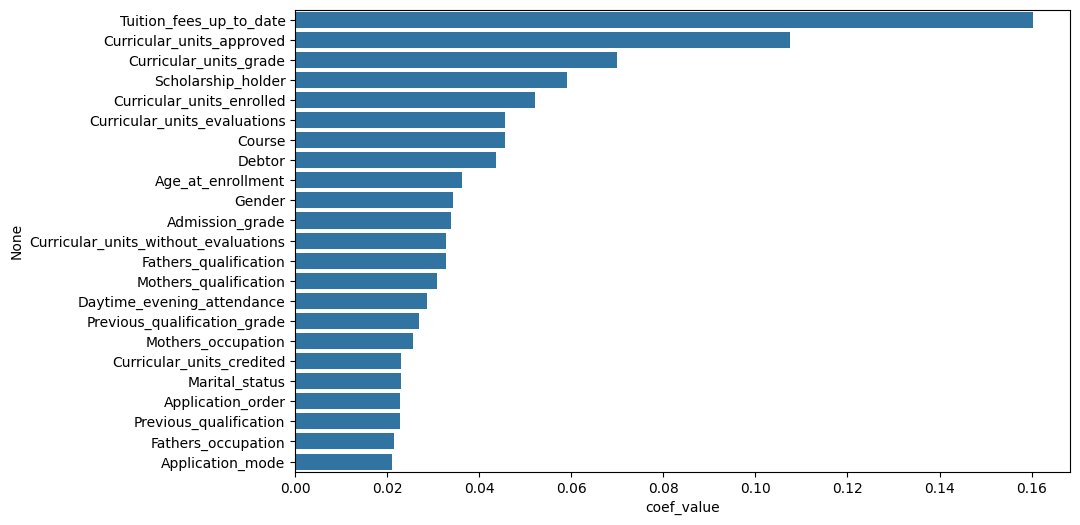

coef_value
Tuition_fees_up_to_date                 0.160368
Curricular_units_approved               0.107601
Curricular_units_grade                  0.069924
Scholarship_holder                      0.058978
Curricular_units_enrolled               0.052218
Curricular_units_evaluations            0.045608
Course                                  0.045500
Debtor                                  0.043635
Age_at_enrollment                       0.036339
Gender                                  0.034207
Admission_grade                         0.033756
Curricular_units_without_evaluations    0.032831
Fathers_qualification                   0.032779
Mothers_qualification                   0.030766
Daytime_evening_attendance              0.028728
Previous_qualification_grade            0.026949
Mothers_occupation                      0.025540
Curricular_units_credited               0.023083
Marital_status                          0.022923
Application_order                       0.022875
Previous_qualification                  0.022874
Fathers_occupation                      0.021419
Application_mode                        0.021098

In [153]:
# Fungsi plot_feature_importances
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=["coef_value"]).set_index(cols)
    features = features.sort_values(by="coef_value", ascending=False)
    top_features = features

    plt.figure(figsize=(10, 6))
    sns.barplot(x="coef_value", y=features.index, data=features)
    plt.show()
    return top_features

plot_feature_importances(model.feature_importances_, X_train.columns)

Berdasarkan nilai coefisien valuenya terdapat 10 feature yang terpenting dalam model tersebut adalah
- Tuition_fees_up_to_date
- Curricular_units_approved
- Curricular_units_grade
- Scholarship_holder
- Curricular_units_enrolled
- Course
- Curricular_units_evaluations
- Debtor
- Age_at_enrollment
- Gender

Feature tersebut hampir sama hasilnya ketika menjalankan ANOVA test dan Cramer"s V Value. 10 Feature ini akan ditampilkan dalam business dashboard.

## Evaluation

Proses evaluasi dilakukan dengan menggambar grafik ROC curve dari masing-masing class status mahasiswa dengan bantuan helper function roc_graph() sebelumnya dilakukan perhitungan fpr, tpr, roc_auc_score dengan fungsi helper fpr_tpr_roc_auc()

In [154]:
# Fungsi helper fpr_tpr_roc_auc()
def fpr_tpr_roc_auc(y_onehot , y_score, n_classes):
    fpr, tpr, roc_auc = dict(), dict(), dict()
    fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_onehot[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

    fpr_grid = np.linspace(0.0, 1.0, 1000)
    mean_tpr = np.zeros_like(fpr_grid)

    for i in range(n_classes):
      mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = fpr_grid
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    return fpr, tpr, roc_auc

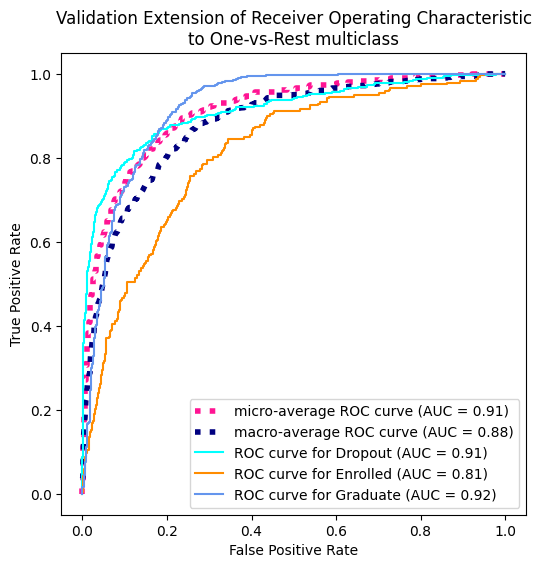

In [156]:
# Fungsi helper roc_graph()
def roc_graph(model, x, y, x_proba, y_transform, n_classes, mode):
  y_score = model.fit(x, y).predict_proba(x_proba)
  label_binarizer = LabelBinarizer().fit(y)
  y_onehot = label_binarizer.transform(y_transform)
  fpr, tpr, roc_auc = fpr_tpr_roc_auc(y_onehot, y_score, n_classes)
  fig, ax = plt.subplots(figsize=(6, 6))

  plt.plot(fpr["micro"], tpr["micro"],
           label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
           color="deeppink", linestyle=":",linewidth=4)

  plt.plot(fpr["macro"], tpr["macro"],
           label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
           color="navy", linestyle=":", linewidth=4)

  colors = cycle(["aqua", "darkorange", "cornflowerblue"])
  labels = ["Dropout", "Enrolled", "Graduate"]
  for class_id, color, labels in zip(range(n_classes), colors, labels):
    RocCurveDisplay.from_predictions(y_onehot[:, class_id],
                                       y_score[:, class_id],
                                       name=f"ROC curve for {labels}",
                                       color=color, ax=ax)

  graph= ax.set(xlabel="False Positive Rate", ylabel="True Positive Rate",
                title=f"{mode} Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")


roc_graph(model = model,
          x = X_train,
          y = y_train,
          x_proba = X_val,
          y_transform = y_val,
          n_classes = 3,
          mode = "Validation")

Selanjutnya dibuat juga confussion matrix menggunakan fungsi helper evaluating_confusion_matrix() yang menunjukkan kemampuan prediksi pada data validasi.

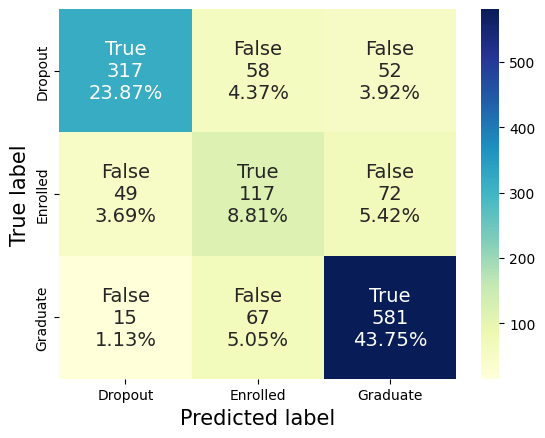

In [157]:
def evaluating_confusion_matrix(model, x, y ):
    y_pred = model.predict(x)


    names=["Dropout", "Enrolled", "Graduate"]
    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y)
    condition = ["True", "False", "False", "False", "True", "False","False", "False", "True"]
    counts = [value for value in cnf_matrix.flatten()]
    percentages = ["{0:.2%}".format(value) for value in cnf_matrix.flatten()/np.sum(cnf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(condition,counts,percentages)]
    labels = np.asarray(labels).reshape((3, 3), order="C")

    sns.heatmap(cnf_matrix, annot= labels, annot_kws={"size": 14}, fmt="", cmap="YlGnBu", xticklabels=names, yticklabels=names)
    plt.ylabel("True label", fontsize=15)
    plt.xlabel("Predicted label", fontsize=15)
    plt.show()

evaluating_confusion_matrix(model, X_val, y_val)

## Menyimpan Model Machine learning

Model kemudian disimpan dalam file model.json

In [158]:
model.save_model("model.json")

## Simulasi Saran Action Item

### Memberi beasiswa pada peraih grade 75% ke atas

Action Item yang disarankan adalah memberi beasiswa pada peraih grade 75% ke atas. Action item ini disarankan karna melihat feature terpenting dalam model salah satunya tuition_fees_up_to_date dan Scholarship_holder. Mahasiswa dengan grade 75% dirasa memiliki kemampuan studi yang bagus sehingga layak diberi beasiswa. Ketika mahasiswa dengan grade 75% memiliki tunggakan makan tuition_fees_update masih bernilai 0 sehingga apabila diberi beasiswa dengan asumsi beasiswa tersebut dapat digunakan untuk membayar tunggakan maka tuition_fees_up_to_date akan bernilai 1. Pertama dibuat actions_df dengan nilai parameter numerical sama seperti pada students_model_df

In [159]:
# Define actions_df
actions_df = students_df.copy()
actions_num_col = actions_df.drop(columns=["ID"]).select_dtypes(include=np.number).columns
for column in actions_num_col:
  actions_df[column] = students_model_df[column]
actions_df

Status    ID  Application_order  Previous_qualification_grade  \
0      Dropout     0           0.555556                         0.610   
1     Graduate     1           0.111111                         0.800   
2      Dropout     2           0.555556                         0.610   
3     Graduate     3           0.222222                         0.610   
4     Graduate     4           0.111111                         0.500   
...        ...   ...                ...                           ...   
4419  Graduate  4419           0.666667                         0.625   
4420   Dropout  4420           0.222222                         0.600   
4421   Dropout  4421           0.111111                         0.770   
4422  Graduate  4422           0.111111                         0.900   
4423  Graduate  4423           0.111111                         0.760   

      Admission_grade  Age_at_enrollment  Curricular_units_credited  \
0              0.6365           0.056604                        0.0   
1              0.7125           0.037736                        0.0   
2              0.6240           0.037736                        0.0   
3              0.5980           0.056604                        0.0   
4              0.7075           0.528302                        0.0   
...               ...                ...                        ...   
4419           0.6110           0.037736                        0.0   
4420           0.5950           0.018868                        0.0   
4421           0.7475           0.245283                        0.0   
4422           0.7690           0.056604                        0.0   
4423           0.7600           0.094340                        0.0   

      Curricular_units_approved  Curricular_units_enrolled  \
0                      0.000000                   0.000000   
1                      0.230769                   0.230769   
2                      0.000000                   0.230769   
3                      0.211538                   0.230769   
4                      0.211538                   0.230769   
...                         ...                        ...   
4419                   0.192308                   0.230769   
4420                   0.153846                   0.230769   
4421                   0.153846                   0.288462   
4422                   0.192308                   0.192308   
4423                   0.230769                   0.230769   

      Curricular_units_evaluations  ...  Daytime_evening_attendance  \
0                         0.000000  ...                           1   
1                         0.166667  ...                           1   
2                         0.000000  ...                           1   
3                         0.250000  ...                           1   
4                         0.208333  ...                           0   
...                            ...  ...                         ...   
4419                      0.208333  ...                           1   
4420                      0.166667  ...                           1   
4421                      0.236111  ...                           1   
4422                      0.152778  ...                           1   
4423                      0.194444  ...                           1   

      Previous_qualification Mothers_qualification Fathers_qualification  \
0                         02                    02                    01   
1                         02                    02                    03   
2                         02                    01                    01   
3                         02                    01                    01   
4                         02                    01                    01   
...                      ...                   ...                   ...   
4419                      02                    02                    02   
4420                      02                    02                    02

Lalu dibuat actions_75 yang merupakan actions_df dengan Curricular_units_grade di atas 0.75. actions_75 kemudian ditampilkan dengan grouping berdasarkan status, scholarship_holder, dan tuition_fees_up_to_date

In [160]:
actions_75 = actions_df[(actions_df["Curricular_units_grade"] >= 0.75)]
actions_75.groupby(by = ["Status", "Scholarship_holder", "Tuition_fees_up_to_date"]).agg({"ID" : "count",}).sort_values(by = ["Status"], ascending = True)

ID
Status   Scholarship_holder Tuition_fees_up_to_date    
Dropout  0                  0                         4
                            1                        18
         1                  1                         1
Enrolled 0                  0                         1
                            1                         7
Graduate 0                  0                         1
                            1                        84
         1                  1                        38

Ternyata kebanyakan mahasiswa dropout tidak menerima beasiswa. Beasiswa kemudian diberi sehingga proses selanjutnya adalah mengubah Scholarship_holder dan Tuition_fees_up_to_date dari mahasiswa dengan grade 75% ke atas menjadi 1

In [161]:
# Mengubah Scholarship_holde dan Tutition_fees_up_to_date
for id in actions_75["ID"]:
  actions_df.loc[actions_df["ID"] == id, "Scholarship_holder"] = "1"
  actions_df.loc[actions_df["ID"] == id, "Tuition_fees_up_to_date"] = "1"
actions_df.head()

Status  ID  Application_order  Previous_qualification_grade  \
0   Dropout   0           0.555556                          0.61   
1  Graduate   1           0.111111                          0.80   
2   Dropout   2           0.555556                          0.61   
3  Graduate   3           0.222222                          0.61   
4  Graduate   4           0.111111                          0.50   

   Admission_grade  Age_at_enrollment  Curricular_units_credited  \
0           0.6365           0.056604                        0.0   
1           0.7125           0.037736                        0.0   
2           0.6240           0.037736                        0.0   
3           0.5980           0.056604                        0.0   
4           0.7075           0.528302                        0.0   

   Curricular_units_approved  Curricular_units_enrolled  \
0                   0.000000                   0.000000   
1                   0.230769                   0.230769   
2                   0.000000                   0.230769   
3                   0.211538                   0.230769   
4                   0.211538                   0.230769   

   Curricular_units_evaluations  ...  Daytime_evening_attendance  \
0                      0.000000  ...                           1   
1                      0.166667  ...                           1   
2                      0.000000  ...                           1   
3                      0.250000  ...                           1   
4                      0.208333  ...                           0   

   Previous_qualification Mothers_qualification Fathers_qualification  \
0                      02                    02                    01   
1                      02                    02                    03   
2                      02                    01                    01   
3                      02                    01                    01   
4                      02                    01                    01   

                               Mothers_occupation  \
0                     Service Workers and Sellers   
1  Intermediate Level Technicians and Professions   
2                               Unskilled Workers   
3                     Service Workers and Sellers   
4                               Unskilled Workers   

                               Fathers_occupation Debtor  \
0                               Unskilled Workers      0   
1  Intermediate Level Technicians and Professions      0   
2                               Unskilled Workers      0   
3  Intermediate Level Technicians and Professions      0   
4                               Unskilled Workers      0   

  Tuition_fees_up_to_date Gender Scholarship_holder  
0                       1      1                  0  
1                       0      1                  0  
2                       0      1                  0  
3                       1      0                  0  
4                       1      0                  0  

[5 rows x 25 columns]

Selanjutnya dilakukan encoding pada actions_df categorical sehingga actions_df dapat menggunakan model nantinya.

In [162]:
# Encoding data categorical
actions_df = actions_df.drop(columns=["ID"])
actions_cat = actions_df.select_dtypes(include="object")

for column in actions_cat.columns:
  actions_df[column]= encoder.fit_transform(actions_df[column])
actions_df.head()

Status  Application_order  Previous_qualification_grade  Admission_grade  \
0       0           0.555556                          0.61           0.6365   
1       2           0.111111                          0.80           0.7125   
2       0           0.555556                          0.61           0.6240   
3       2           0.222222                          0.61           0.5980   
4       2           0.111111                          0.50           0.7075   

   Age_at_enrollment  Curricular_units_credited  Curricular_units_approved  \
0           0.056604                        0.0                   0.000000   
1           0.037736                        0.0                   0.230769   
2           0.037736                        0.0                   0.000000   
3           0.056604                        0.0                   0.211538   
4           0.528302                        0.0                   0.211538   

   Curricular_units_enrolled  Curricular_units_evaluations  \
0                   0.000000                      0.000000   
1                   0.230769                      0.166667   
2                   0.230769                      0.000000   
3                   0.230769                      0.250000   
4                   0.230769                      0.208333   

   Curricular_units_without_evaluations  ...  Daytime_evening_attendance  \
0                                   0.0  ...                           1   
1                                   0.0  ...                           1   
2                                   0.0  ...                           1   
3                                   0.0  ...                           1   
4                                   0.0  ...                           0   

   Previous_qualification  Mothers_qualification  Fathers_qualification  \
0                       1                      2                      1   
1                       1                      2                      3   
2                       1                      1                      1   
3                       1                      1                      1   
4                       1                      1                      1   

   Mothers_occupation  Fathers_occupation  Debtor  Tuition_fees_up_to_date  \
0                   7                  10       0                        1   
1                   4                   4       0                        0   
2                  10                  10       0                        0   
3                   7                   4       0                        1   
4                  10                  10       0                        1   

   Gender  Scholarship_holder  
0       1                   0  
1       1                   0  
2       1                   0  
3       0                   0  
4       0                   0  

[5 rows x 24 columns]

Kemudian dibuat actions_test yang merupakan feature indipendent tanpa variable target. Kemudian dengan menggunakan model yang sudah dibuat kita akan memprediksikan status dari mahasiswa yang akan disimpan dalam actions_predict. Nilai masing-masing dari class status mahasiswa juga ditampilkan setelahnya

In [163]:
# Prediksi status mahasiswa setelah perubahan dengan action_item
actions_test = actions_df.drop(columns=["Status"])
actions_predict = model.predict(actions_test)
encoder_actions = encoder.fit(students_df["Status"])
actions_predict = encoder_actions.inverse_transform(actions_predict)
actions_predict = pd.Series(actions_predict)
actions_predict.value_counts()

Graduate    2312
Dropout     1285
Enrolled     827
Name: count, dtype: int64

In [164]:
students_df["Status"].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [165]:
graduate_change = 100*(2312-2209)/2209
dropout_change = 100*(1285-1421)/1421
enrolled_change = 100*(827-794)/794
dropout_rate_before= 100*(1421)/4424
dropout_rate_after = 100*(1285)/4424
print(f"Persentase perubahan jumlah mahasiswa yang berstatus Graduate : {round(graduate_change, 2)} %")
print(f"Persentase perubahan jumlah mahasiswa yang berstatus Dropout : {round(dropout_change, 2)} %")
print(f"Persentase perubahan jumlah mahasiswa yang berstatus Enrolled : {round(enrolled_change, 2)} %")
print(f"Persentase perubahan jumlah Dropout Rate sebelum : {round(dropout_rate_before, 2)} %")
print(f"Persentase perubahan jumlah Dropout Rate setelah : {round(dropout_rate_after, 2)} %")

Persentase perubahan jumlah mahasiswa yang berstatus Graduate : 4.66 %
Persentase perubahan jumlah mahasiswa yang berstatus Dropout : -9.57 %
Persentase perubahan jumlah mahasiswa yang berstatus Enrolled : 4.16 %
Persentase perubahan jumlah Dropout Rate sebelum : 32.12 %
Persentase perubahan jumlah Dropout Rate setelah : 29.05 %


Selanjutnya dapat dibandingkan dengan data sumber students_df. Dengan menerapkan action item tersebut jumlah mahasiswa graduate naik sebesar 4.66%, jumlah mahasiswa dropout berkurang sebesar 9.57% dan jumlah mahasiswa enrolled naik sebesar 4.16%. Selain itu, drop-out rate yang tadinya sebesar 32.12% turun menjadi 29.2%.
Sehingga action item ini berhasil menurunkan nilai dropout dan dapat dicoba penerapannya oleh institusi. Hasil prediksi akan disimpan dalam actions.csv untuk ditampilkan sebagai perbanding dalam business dashboard.

In [166]:
actions_df["Status"] = actions_predict
for column in actions_num_col:
  actions_df[column] = students_df[column]

actions_df.to_csv("actions.csv", index=False)

## Kesimpulan dan Saran Action Item

### Kesimpulan

- Berdasarkan uji ANOVA, Cramer"s V value dan features important model terdapat 10 features terpenting yang mempengaruhi status mahasiswa yaitu:

    - Tuition_fees_up_to_date
    - Curricular_units_approved
    - Curricular_units_grade
    - Scholarship_holder
    - Curricular_units_enrolled
    - Course
    - Curricular_units_evaluations
    - Debtor
    - Age_at_enrollment
    - Gender
    dengan bantuan visualisasi data diperoleh bahwa:
      - Jumlah keseluruhan mahasiswa adalah 4424 orang dengan jumlah graduate 2209, jumlah enrolled 794 dan dropout 1421 serta dropout_rate 32.12%
      - Tagihan pembayaran yang belum terupdate paling banyak dari mahasiswa dropout
      - Sebagian besar mahasiswa dropout tidak memiliki beasiswa. Sebagian besar yang memiliki beasiswa berhasil lulus
      - Jumlah mahasiswa yang lulus dari masing-masing jurusan jumlahnya lebih banyak dibanding yang dropout kecuali pada jurusan technology dan engineering, basic education
      - Kebanyakan mahasiswa yang dropout tidak memiliki tagihan hutang. Akan tetapi, sebagian besar yang memiliki tagihan hutang mengalami dropout.
      - Sebaran gender mahasiswa dropout hampir sama, pada masing-masing kategori status mahasiswa, jumlah terbesarnya adalah laki-laki.
      - berdasarkan curricular_units_grade, kebanyakan mahasiswa yang dropout memiliki nilai di bawah 5 dan antara 10-15
      - Curricular_units_enrolled dan Curricular_units_approve besarnya berbanding lurus
      - Rata-rata umur mahasiswa di angka 23,7
      

### Saran Action Item

- Memberi beasiswa pada peraih grade 75% ke atas. Action item ini berhasil memprediksi jumlah mahasiswa graduate naik sebesar 4.66%, jumlah mahasiswa dropout berkurang sebesar 9.57% dan jumlah mahasiswa enrolled naik sebesar 4.16%. Selain itu dropout rate turun menjadi 29.05%.

- Saran action item lain yaitu mengadakan tutor agar mahasisw bisa menaikan nilai perkuliahan.